
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fblaura/FraudD/blob/main/4_Supervised_models/1_Model_training_for_dataset_with_StandardScaler_and_SMOTE0_1.ipynb)

**Please execute all instructions as indicated.** 

The dataset is downloaded directly from a Drive link, this dataset already went through a previous preprocessing.We will work on dimensionality reduction, making use of model selection techniques (which are part of the Scikit-Learn library).  We will evaluate the results from some classification metrics and graphs that will allow us to identify the prediction of each model. 

**Some functions and graphs are mentioned in Spanish, please translate them if required.**

# **1. General libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer, StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.feature_selection import SelectFromModel, RFECV, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, cross_val_predict, validation_curve
from datetime import datetime
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, f1_score,plot_roc_curve, classification_report,log_loss,recall_score,adjusted_rand_score


In [ ]:
#from sklearn.metrics import rand_score


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, roc_curve,precision_score,roc_auc_score

In [ ]:
from sklearn.decomposition import PCA,  IncrementalPCA, FastICA
from sklearn.neighbors import KNeighborsClassifier
# Randomization
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.metrics import silhouette_samples, silhouette_score,jaccard_score
from sklearn.metrics import pairwise_distances_argmin_min
import random

# **2. Defining different functions**

In [ ]:
def roc_curve_plot(model,model_name,ytest,xtest):
  pred_prob = model.predict_proba(xtest)
  fpr, tpr, thresh = roc_curve(ytest, pred_prob[:,1], pos_label=1)
  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(ytest))]
  p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)
  #plot
  plt.style.use('seaborn')
  auc=roc_auc_score(ytest, pred_prob[:,1])
  # plot roc curves
  plt.plot(fpr, tpr,linewidth=3, linestyle='--',color='orange', label="AUC="+str(auc))
  plt.plot(p_fpr, p_tpr, linewidth=3, linestyle='--', color='blue')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.show()
  return plt

In [ ]:
#Función definida para gráficar el análisis de silueta 
# ==============================================================================

def silhouette_analysis(X, range_n_clusters):
    #range_n_clusters = [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21]

    
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 1 columns
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(19, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters,  max_iter = 300, n_init = 10, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        plt.suptitle(("Silhouette analysis for %s clustering on sample data "
                      "with n_clusters = %d, score = %.3f" % (clusterer.__class__.__name__, n_clusters,silhouette_avg)),
                     fontsize=14, fontweight='bold')

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    plt.style.use('seaborn')
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
def impresión_reporte(nclusters,Y,labels):
  
  print(f'Reporte de métricas para KMeans con clusters = {nclusters}')
  print('-'*80)
  print(f'Log_loss = {log_loss(Y, labels)}')
  print(f'Puntuación de exactitud = {accuracy_score(Y, labels)}')
  print(f'Puntuación de sensibilidad = {recall_score(Y, labels)}')
  print(f'Puntuación de precisión = {precision_score(Y, labels)}')
  print(f'Puntuación de Rand ajustado = {adjusted_rand_score(Y, labels)}')
  print(f'Puntuación de Jaccard = {jaccard_score(Y, labels)}')
  cmtx = pd.DataFrame(
      confusion_matrix(Y, labels, labels=[1, 0]), 
      index=['Fraude:1', 'NoFraude:0'], 
      columns=['Fraude:1', 'NoFraude:0']
  )
  print('Matriz de confusión = ')
  print(cmtx)

In [ ]:
def classifier_model(X_train, X_test, y_train, y_test, method, data):
    accuracies, roc_auc,f1=[],[],[]
    modelos=['Random Forest','Gradient Boosting','XGBoost','Regresión logística','Naive Bayes','SVM']
    rf_clf=RandomForestClassifier(n_estimators=700, random_state=1)
    rf_clf.fit(X_train, y_train)
    y_pred_rf=rf_clf.predict(X_test)
    score_rlf=accuracy_score(y_test, y_pred_rf)
    roc_auc_rlf=roc_auc_score(y_test, y_pred_rf)
    f1_sco=f1_score(y_test, y_pred_rf,average='macro')
    accuracies.append(score_rlf)
    roc_auc.append(roc_auc_rlf)
    f1.append(f1_sco)
    print("---Método de trabajo: {}---". format(method))
    print("---Observando comportamiendo de métricas para {}---".format(data))
    print("The accuracy score of Random Forest:", score_rlf)
    print("The ROC_AUC score of Random Forest:", roc_auc_rlf)
    print("The F1 score of Random Forest:", f1_sco)
    print('---------------------------------------------------')
    
    gb_clf= GradientBoostingClassifier(learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
    gb_clf.fit(X_train, y_train)
    y_pred_gb=gb_clf.predict(X_test)
    score_gb=accuracy_score(y_test, y_pred_gb)
    roc_auc_gb=roc_auc_score(y_test,  y_pred_gb)
    f1_sco_gb=f1_score(y_test, y_pred_gb,average='micro')
    accuracies.append(score_gb)
    roc_auc.append(roc_auc_gb)
    f1.append(f1_sco_gb)
    print("The accuracy score of Gradient Boosting:", score_gb)
    print("The ROC_AUC score of Gradient Boosting:", roc_auc_gb)
    print("The F1 score of Gradient Boosting:", f1_sco_gb)

    print('---------------------------------------------------')
    xg_clf=XGBClassifier()
    xg_clf.fit(X_train, y_train)
    y_pred_xg=xg_clf.predict(X_test)
    score_xg=accuracy_score(y_test, y_pred_xg)
    roc_auc_xg=roc_auc_score(y_test, y_pred_xg)
    f1_sco_xg=f1_score(y_test, y_pred_xg,average='micro')
    accuracies.append(score_xg)
    roc_auc.append(roc_auc_xg)
    f1.append(f1_sco_xg)
    print("The accuracy score of XGBoost:", score_xg)
    print("The ROC_AUC score of XGBoost:", roc_auc_xg)
    print("The F1 score of XGBoost:", f1_sco_xg)
    print('---------------------------------------------------')
    clf = LogisticRegression(random_state=0, max_iter=5000)
    clf.fit(X_train, y_train)
    y_pred_l=clf.predict(X_test)
    score_l=accuracy_score(y_test, y_pred_l)
    roc_auc_l=roc_auc_score(y_test, y_pred_l)
    f1_sco_l=f1_score(y_test, y_pred_l,average='micro')
    accuracies.append(score_l)
    roc_auc.append(roc_auc_l)
    f1.append(f1_sco_l)
    print("The accuracy score of Regresión logística:", score_l)
    print("The ROC_AUC score of Regresión logística:", roc_auc_l)  
    print("The F1 score of Regresión logística:", f1_sco_l)
    print('---------------------------------------------------')
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred_gnb=gnb.predict(X_test)
    score_gnb=accuracy_score(y_test, y_pred_gnb)
    roc_auc_gnb=roc_auc_score(y_test, y_pred_gnb)
    f1_sco_gnb=f1_score(y_test, y_pred_gnb,average='micro')
    accuracies.append(score_gnb)
    roc_auc.append(roc_auc_gnb)
    f1.append(f1_sco_gnb)
    print("The accuracy score of Naive Bayes:", score_gnb)
    print("The ROC_AUC score of Naive Bayes:", roc_auc_gnb)   
    print("The F1 score of Naive Bayes:", f1_sco_gnb)
    print('---------------------------------------------------')
    svc=LinearSVC()
    svc.fit(X_train, y_train)
    y_pred_svc=svc.predict(X_test)
    score_svc=accuracy_score(y_test, y_pred_svc)
    roc_auc_svc=roc_auc_score(y_test, y_pred_svc)
    f1_sco_svc=f1_score(y_test, y_pred_svc,average='micro')
    accuracies.append(score_svc)
    roc_auc.append(roc_auc_svc)
    f1.append(f1_sco_svc)
    print("The accuracy score of SVM:", score_svc)
    print("The ROC_AUC score of SVM:", roc_auc_svc)  
    print("The F1 score of Naive Bayes:", f1_sco_svc)
    return  accuracies, roc_auc,f1, modelos

In [ ]:
def autolabel(rects):
    for rect in rects:
        
        width = rect.get_width()
        plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%.2f' % float(width),
                 ha='center', va='center')

In [ ]:
def labels(rects):
  for p in rects.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),((p.get_x()-0.15)+p.get_width(), p.get_height()+2),ha='center',va='center')

# **3. Dataset definition**

In [ ]:
from google.colab import files

In [ ]:
#train_fill
!gdown --id 1JPoAQMBKVeVOhmerYESaKXjVbGaz8zki

Downloading...
From: https://drive.google.com/uc?id=1JPoAQMBKVeVOhmerYESaKXjVbGaz8zki
To: /content/X_trainn_01.csv
100% 426M/426M [00:06<00:00, 60.9MB/s]


In [ ]:
X_trainn_01 = pd.read_csv('/content/X_trainn_01.csv',error_bad_lines=False)

In [ ]:
X_trainn_01

ProductCD         card4  ...   CentsDigits  isFraud
0      1.337826e-06  3.344566e-07  ...  3.344566e-07        0
1      1.337840e-06  6.689199e-07  ...  3.344599e-07        0
2      1.337837e-06  1.003378e-06  ...  3.344593e-07        0
3      1.337813e-06  6.689063e-07  ...  3.344531e-07        0
4      3.340060e-07  6.680121e-07  ...  3.340060e-07        0
...             ...           ...  ...           ...      ...
78139  1.036550e-06  9.060658e-07  ...  4.521176e-07        1
78140  1.239151e-06  9.082538e-07  ...  3.097878e-07        1
78141  1.307979e-06  9.809843e-07  ...  3.269948e-07        1
78142  1.330286e-06  6.651432e-07  ...  3.325716e-07        1
78143  0.000000e+00  5.920627e-07  ...  8.880940e-07        1

[78144 rows x 432 columns]

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
Y = X_trainn_01['isFraud']
X = X_trainn_01.drop(['isFraud', 'TransactionID'], axis=1)

In [ ]:
target_n=pd.unique(Y)
target_n

array([0, 1])

# **4. Dimensionality reduction PCA**

## **A. PCA** 

In [ ]:
X.shape

(78144, 430)

In [ ]:
pca = PCA(n_components=430)
pca.fit(X)
X_pca = pca.transform(X)

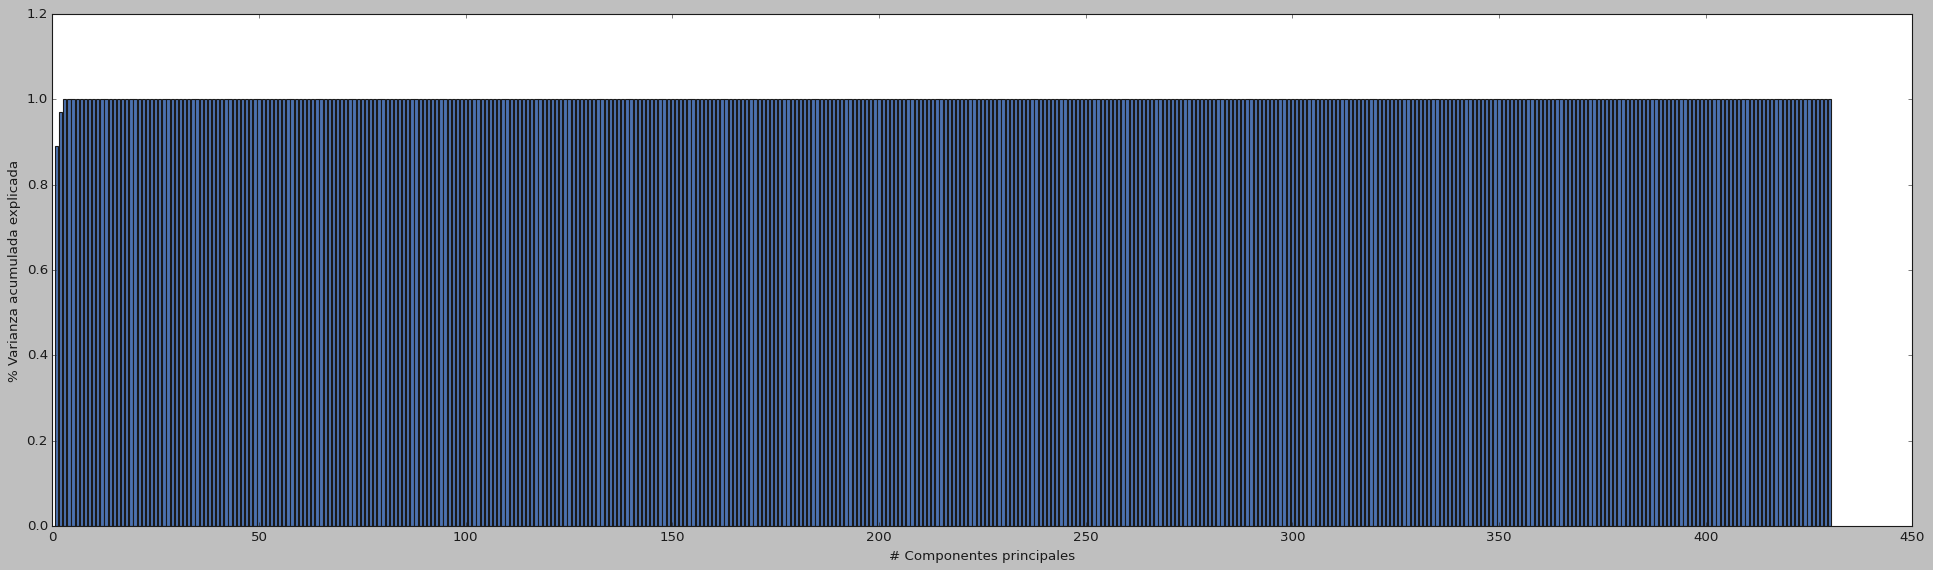

In [ ]:
# Calculate cumulative explained variance across all PCs
plt.style.use('classic')
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(30,8))
ax.set_ylim([0, 1.2])
ax.bar(range(1,431), cum_exp_var)
ax.set_xlabel('# Componentes principales')
ax.set_ylabel('% Varianza acumulada explicada');

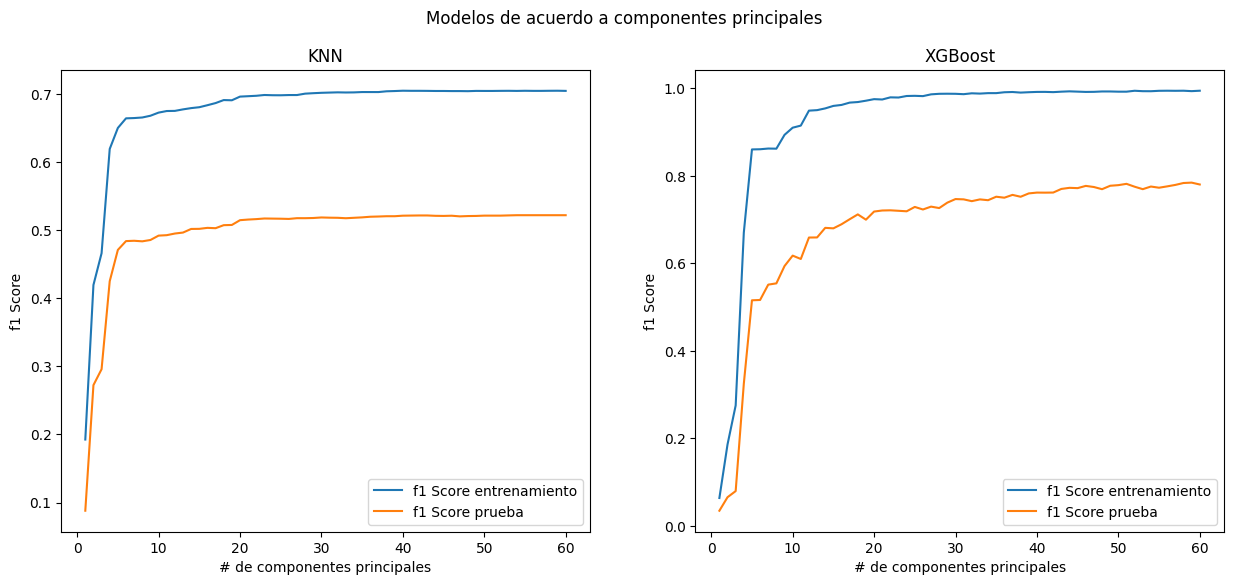

In [ ]:
#1h 20 min
plt.style.use('default')

knntrain_f1, xgtrain_f1 = [],[]
kntest_f1,xgtest_f1 = [],[]


for i in range(60):
    
    X = X_pca[:,0:i+1]
    #print(i)
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                        test_size=0.25,
                                                        random_state=42)


    # Fit k-NN classifier and make predictions
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    knntrain_f1.append(f1_score(y_train, y_pred_train))
    kntest_f1.append(f1_score(y_test, y_pred_test))

    #Fit with XGBoost
    xgb=XGBClassifier(eta=0.1,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6)
    xgb.fit(X_train, y_train)
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    xgtrain_f1.append(f1_score(y_train, y_pred_train))
    xgtest_f1.append(f1_score(y_test, y_pred_test))

# Plot accuracy by n_neighbors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Modelos de acuerdo a componentes principales')
ax1.set_title('KNN')
ax1.plot(range(1,61), knntrain_f1, label='f1 Score entrenamiento' )
ax1.plot(range(1,61), kntest_f1, label='f1 Score prueba')
ax1.set_ylabel('f1 Score')
ax1.set_xlabel('# de componentes principales')
ax1.legend()
#plot 2
ax2.set_title('XGBoost')
ax2.plot(range(1,61), xgtrain_f1, label='f1 Score entrenamiento')
ax2.plot(range(1,61), xgtest_f1, label='f1 Score prueba')
ax2.set_ylabel('f1 Score')
ax2.set_xlabel('# de componentes principales')
ax2.legend()
plt.show()

In [ ]:
X = X_pca[:,0:60]
     
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=42)


# Fit k-NN classifier and make predictions
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print(f'Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))
print('--'*60)
xgb=XGBClassifier(eta=0.1,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
print(f'XGB Train f1 Score: {f1_score(y_train, y_pred_train)}')
print(f'XGB Test f1 Score: {f1_score(y_test, y_pred_test)}')
print(classification_report(y_test, y_pred_test))

Train f1 Score: 0.7044764026736884
Test f1 Score: 0.5219557770165058
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17779
           1       0.58      0.48      0.52      1757

    accuracy                           0.92     19536
   macro avg       0.76      0.72      0.74     19536
weighted avg       0.92      0.92      0.92     19536

------------------------------------------------------------------------------------------------------------------------
XGB Train f1 Score: 0.994735852603873
XGB Test f1 Score: 0.7804546996946048
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17779
           1       0.97      0.65      0.78      1757

    accuracy                           0.97     19536
   macro avg       0.97      0.83      0.88     19536
weighted avg       0.97      0.97      0.96     19536



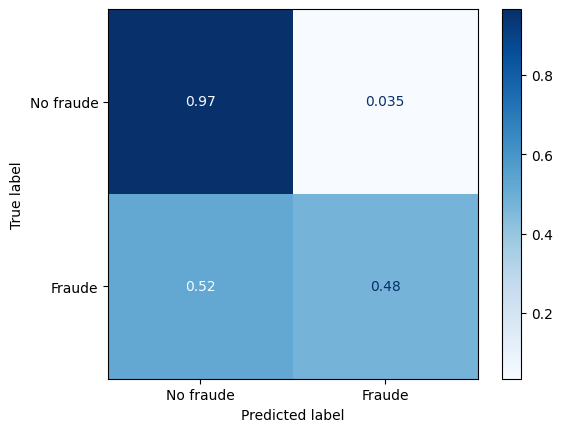

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['No fraude',
                                                          'Fraude'],
                     normalize='true', cmap='Blues');

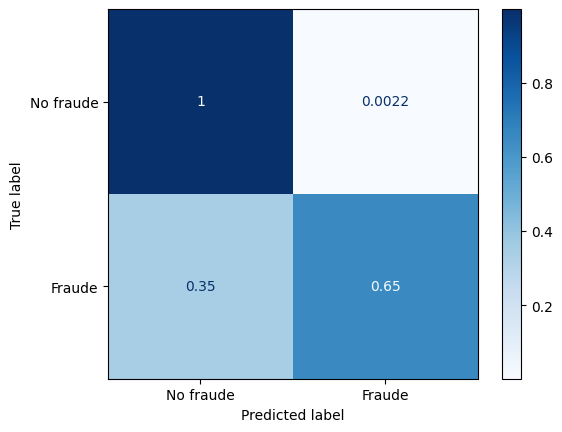

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['No fraude',
                                                          'Fraude'],
                     normalize='true', cmap='Blues');

In [ ]:
pca = PCA(n_components=60)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_new = pca.inverse_transform(X_pca)
dfX = pd.DataFrame(X_new)
dfpca = pd.DataFrame(X_pca)

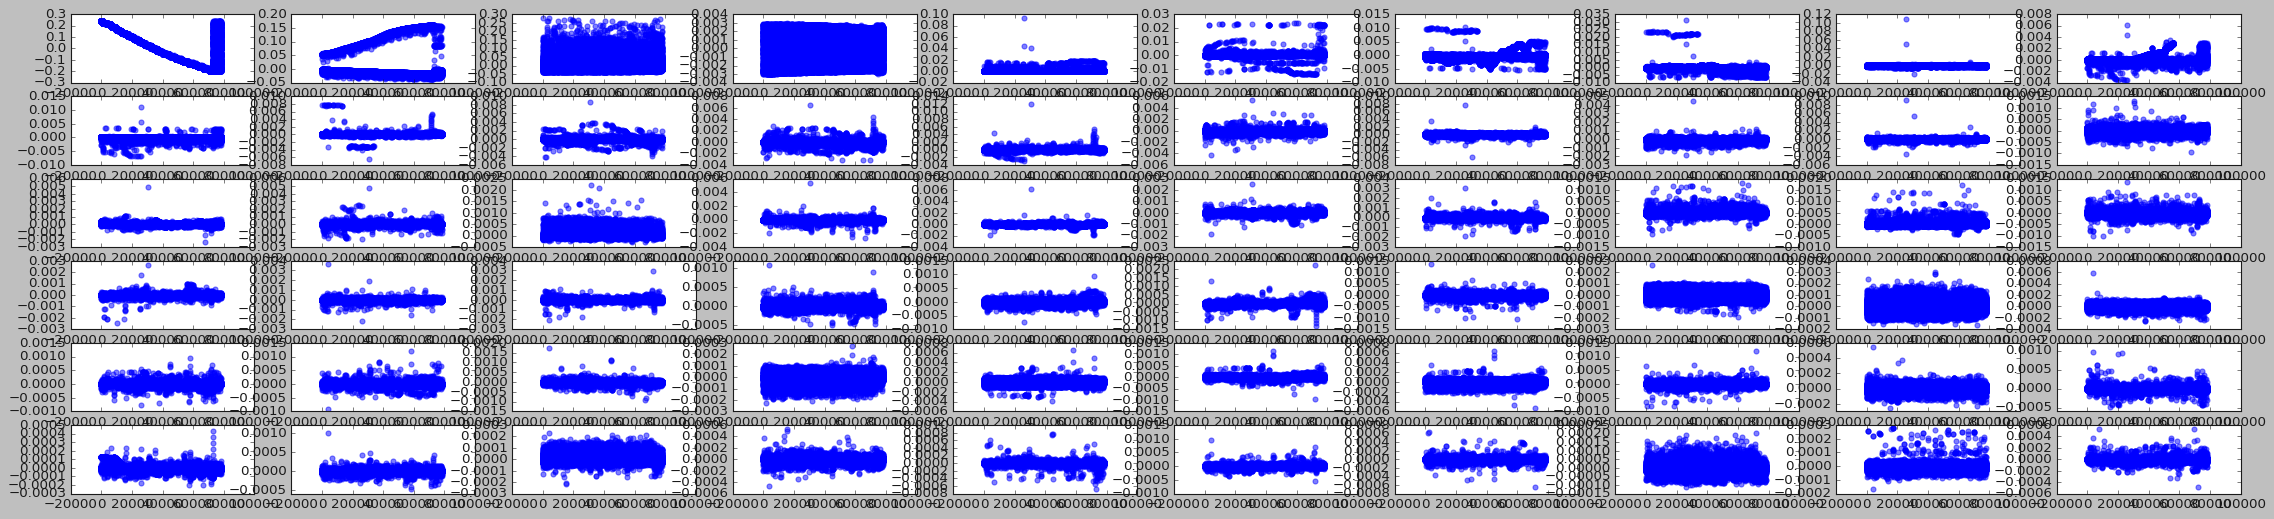

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(35, 55)) 
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i in dfX.columns:
    #plt.figure()
    #plt.subplot(86, 5, i+1)
    x=np.arange(len(dfX[i]))
    
    plt.subplot(43, 10, i+1)
    plt.scatter(x,dfX[i], alpha=.5, color='blue')
    #ax.scatter(x,dfpca[i],alpha=0.4)

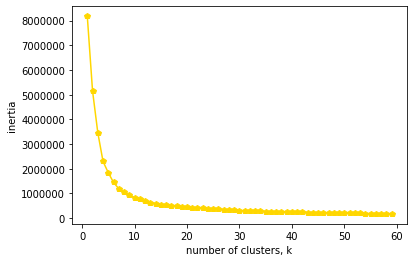

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,60):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(dfpca.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,60), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.ticklabel_format(useOffset=False, style='plain')

#plt.xticks(ks)
plt.show()

In [ ]:
nclusters=2
model = KMeans(n_clusters=nclusters)
model.fit(dfpca.iloc[:,:2])



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = model.predict(dfpca.iloc[:,:2])

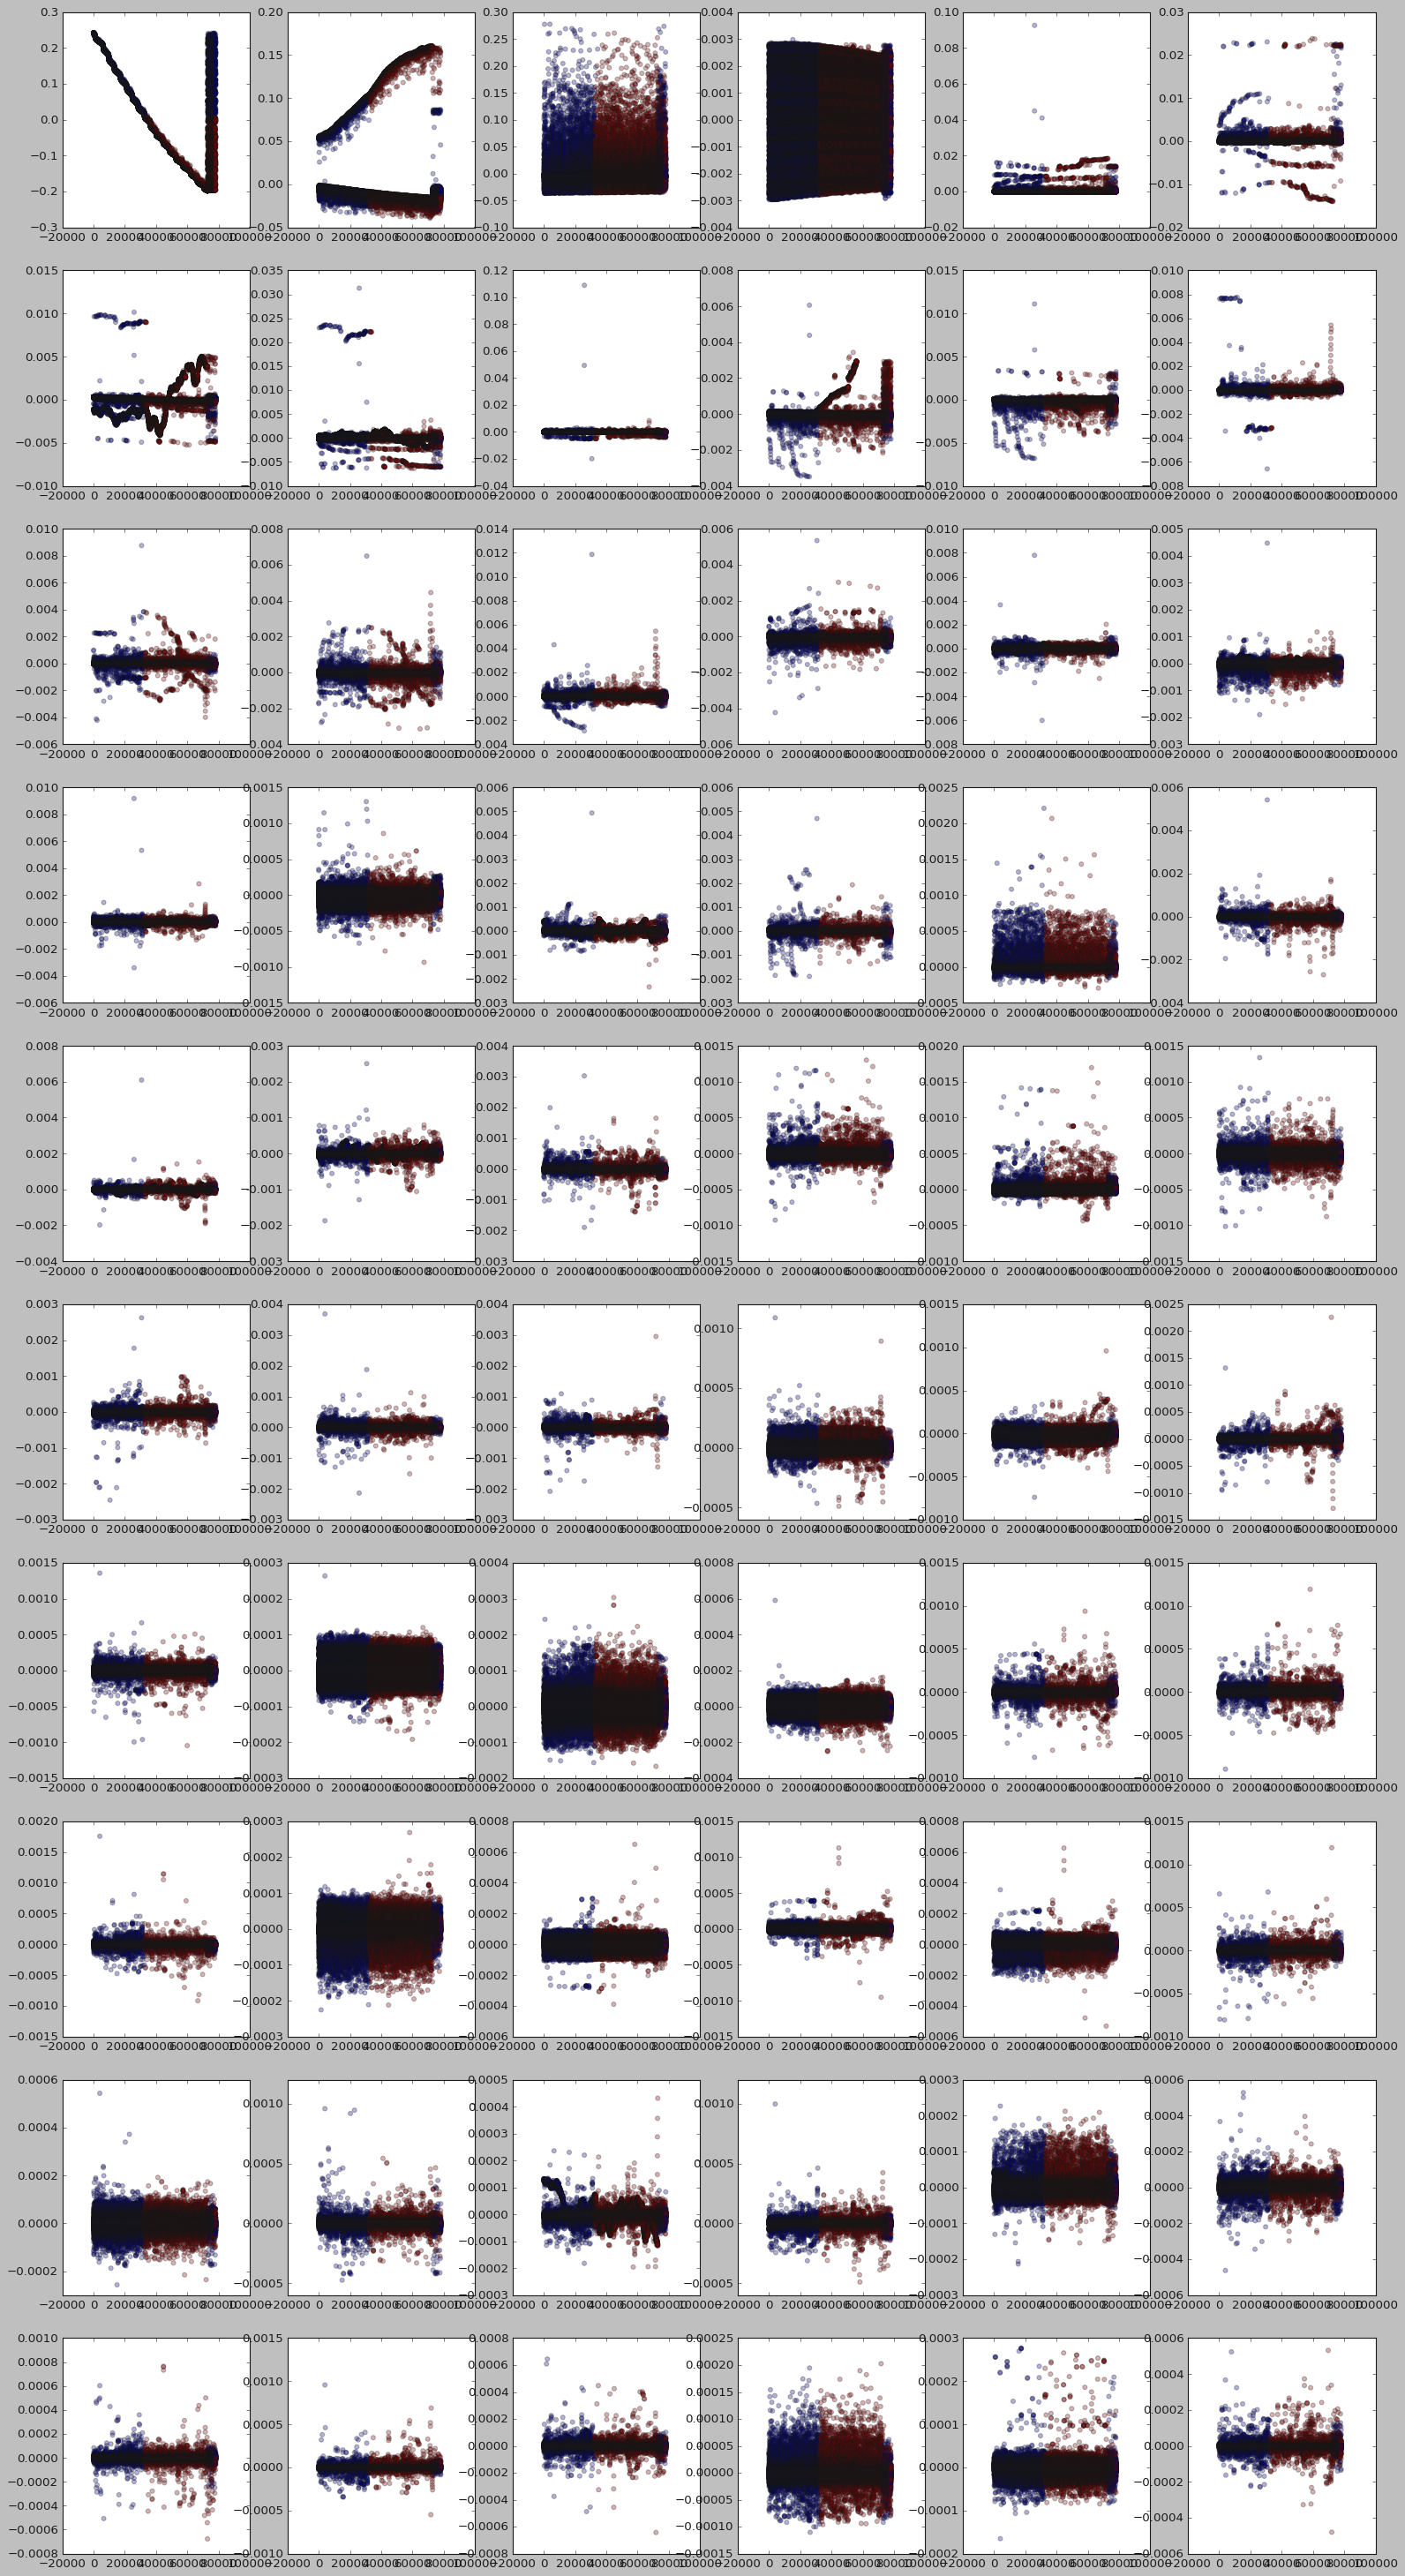

In [ ]:
#plt.scatter(dfpca[0], dfpca[1], c=labels)
#plt.show()

plt.figure(figsize=(24, 45)) 
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i in dfpca.columns:
    #plt.figure()
    #plt.subplot(86, 5, i+1)
    x=np.arange(len(dfpca[i]))
    
    plt.subplot(10, 6, i+1)
    plt.scatter(x,dfpca[i], alpha=0.3, c=labels)
    #ax.scatter(x,dfpca[i],alpha=0.4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfpca, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train, X_test, y_train, y_test, "PCA", "PCA con 60 componentes")

---Método de trabajo: PCA---
---Observando comportamiendo de métricas para PCA con 60 componentes---
The accuracy score of Random Forest: 0.9621212121212122
The ROC_AUC score of Random Forest: 0.7974943693693693
The F1 score of Random Forest: 0.8603217952160052
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9706695331695332
The ROC_AUC score of Gradient Boosting: 0.84375
The F1 score of Gradient Boosting: 0.9706695331695332
---------------------------------------------------
The accuracy score of XGBoost: 0.929412366912367
The ROC_AUC score of XGBoost: 0.6229166666666666
The F1 score of XGBoost: 0.929412366912367
---------------------------------------------------
The accuracy score of Regresión logística: 0.9090909090909091
The ROC_AUC score of Regresión logística: 0.5
The F1 score of Regresión logística: 0.9090909090909091
---------------------------------------------------
The accuracy score of Naive Bayes: 0.8796068796068796
The ROC_A

In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

In [ ]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 10.3 MB 8.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


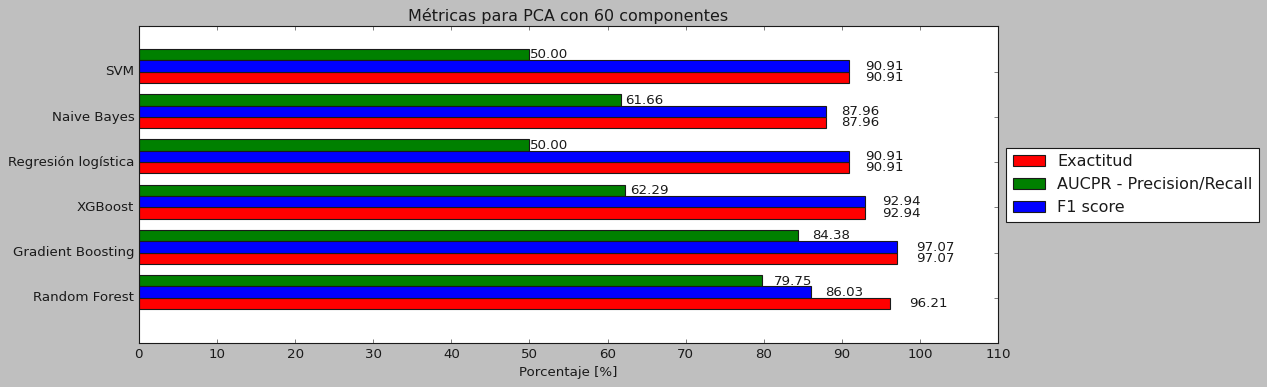

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para PCA con 60 componentes')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
impresión_reporte(nclusters,Y,labels)

Reporte de métricas para KMeans con clusters = 2
--------------------------------------------------------------------------------
Log_loss = 18.87155817370043
Puntuación de exactitud = 0.4536240786240786
Puntuación de sensibilidad = 0.5256193693693694
Puntuación de precisión = 0.08671620993961913
Puntuación de Rand ajustado = 0.0016361881819787127
Puntuación de Jaccard = 0.0804221408572044
Matriz de confusión = 
            Fraude:1  NoFraude:0
Fraude:1        3734        3370
NoFraude:0     39326       31714


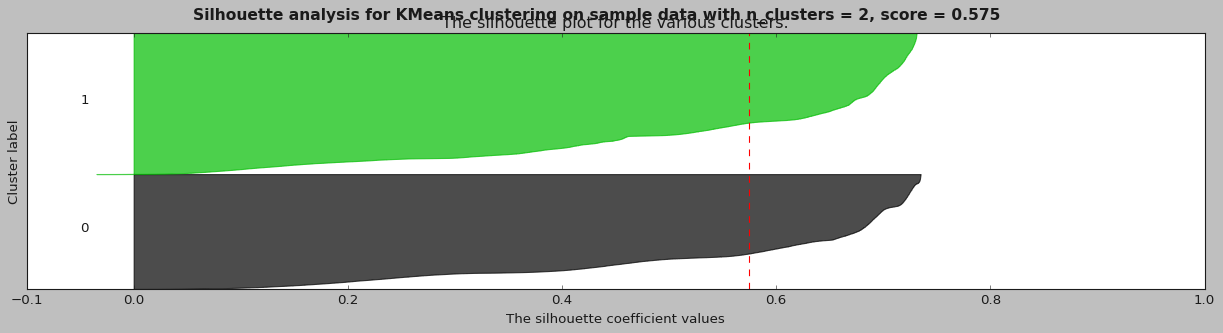

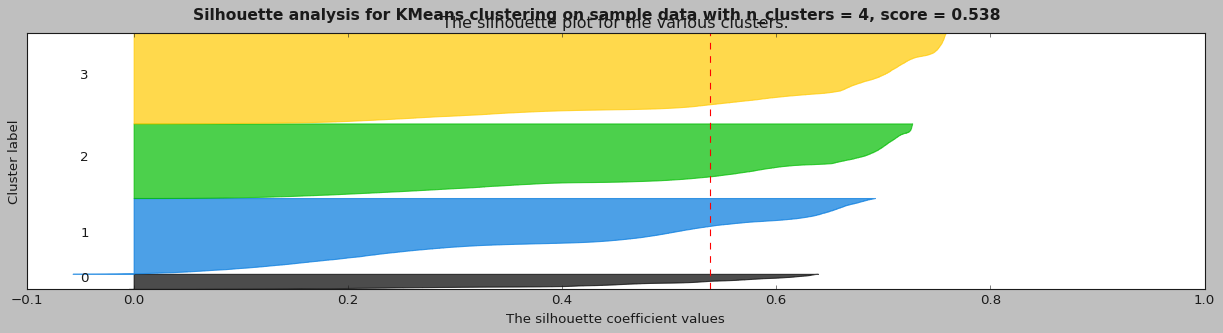

In [ ]:
range_n_clusters = [2, 4]
silhouette_analysis(dfpca, range_n_clusters)

## **B. PCA incremental** 

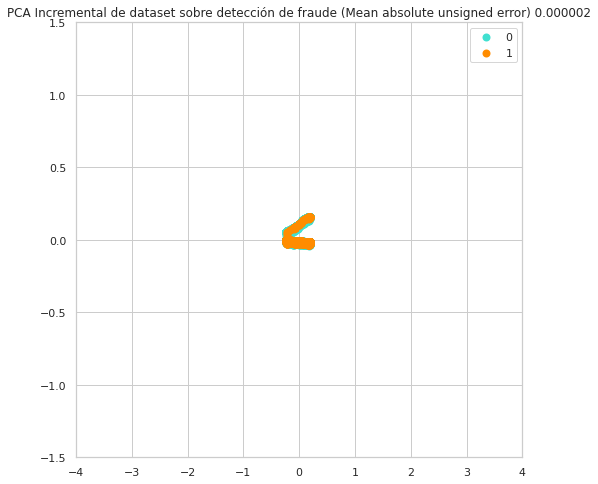

In [ ]:
n_components = 60
ipca = IncrementalPCA(n_components=n_components, batch_size=300)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['turquoise', 'darkorange']


plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], target_n):
    plt.scatter(X_ipca[Y == i, 0], X_ipca[Y == i, 1],
                color=color, lw=2, label=target_name)
    err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
    plt.title("PCA Incremental de dataset sobre detección de fraude (Mean absolute unsigned error) "
              "%.6f" % err)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [ ]:
Xipca = pd.DataFrame(X_ipca)

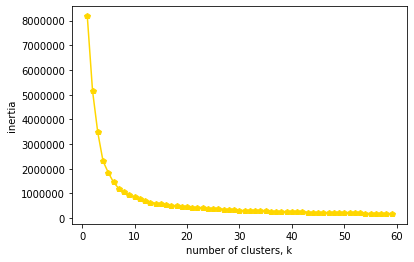

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,60):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Xipca.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,60), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.ticklabel_format(useOffset=False, style='plain')

#plt.xticks(ks)
plt.show()

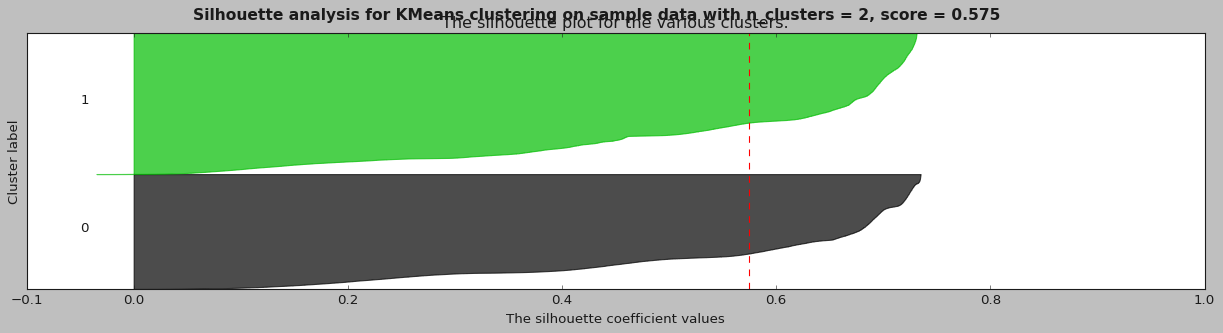

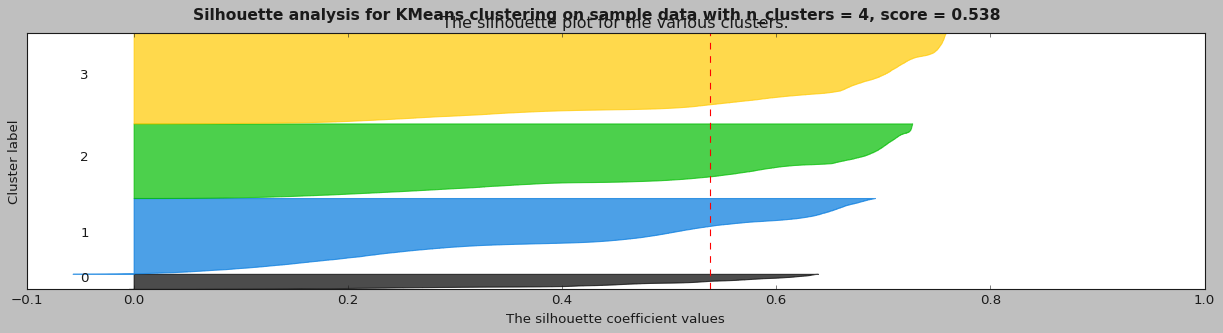

In [ ]:
range_n_clusters = [2, 4]
silhouette_analysis(Xipca, range_n_clusters)

In [ ]:
nclusters=2
model = KMeans(n_clusters=nclusters)
model.fit(Xipca.iloc[:,:2])
labels = model.predict(Xipca.iloc[:,:2])

In [ ]:
impresión_reporte(nclusters,Y,labels)

Reporte de métricas para KMeans con clusters = 2
--------------------------------------------------------------------------------
Log_loss = 15.66794512796498
Puntuación de exactitud = 0.5463759213759214
Puntuación de sensibilidad = 0.47438063063063063
Puntuación de precisión = 0.09605518184927603
Puntuación de Rand ajustado = 0.0016361881819787127
Puntuación de Jaccard = 0.08681539491988254
Matriz de confusión = 
            Fraude:1  NoFraude:0
Fraude:1        3370        3734
NoFraude:0     31714       39326


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xipca, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train, X_test, y_train, y_test, "PCA", "PCA incremental con 60 componentes")

---Método de trabajo: PCA---
---Observando comportamiendo de métricas para PCA incremental con 60 componentes---
The accuracy score of Random Forest: 0.9621212121212122
The ROC_AUC score of Random Forest: 0.7974943693693693
The F1 score of Random Forest: 0.8603217952160052
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9698505323505323
The ROC_AUC score of Gradient Boosting: 0.8400056306306305
The F1 score of Gradient Boosting: 0.9698505323505323
---------------------------------------------------
The accuracy score of XGBoost: 0.929412366912367
The ROC_AUC score of XGBoost: 0.6229166666666666
The F1 score of XGBoost: 0.929412366912367
---------------------------------------------------
The accuracy score of Regresión logística: 0.9090909090909091
The ROC_AUC score of Regresión logística: 0.5
The F1 score of Regresión logística: 0.9090909090909091
---------------------------------------------------
The accuracy score of Naive Bayes: 0.879

In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

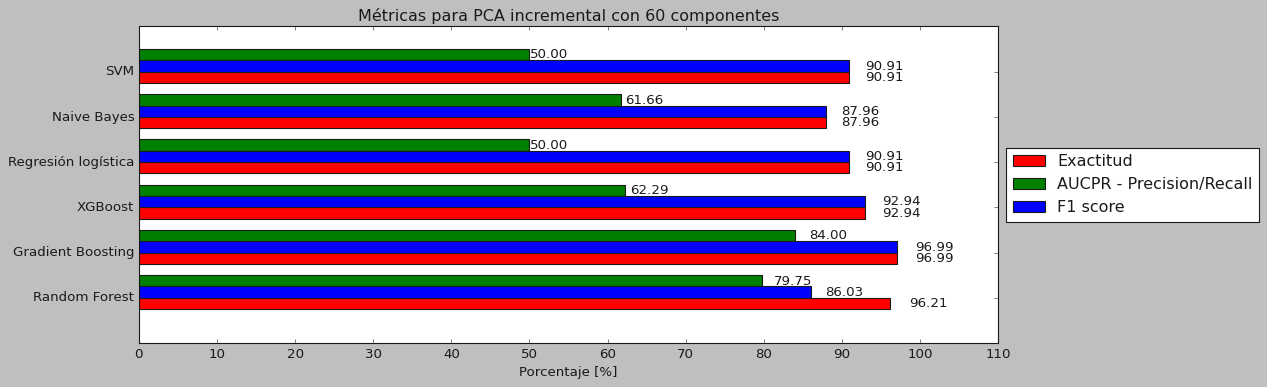

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para PCA incremental con 60 componentes')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

## **C. ICA - Independent Component Analysis**

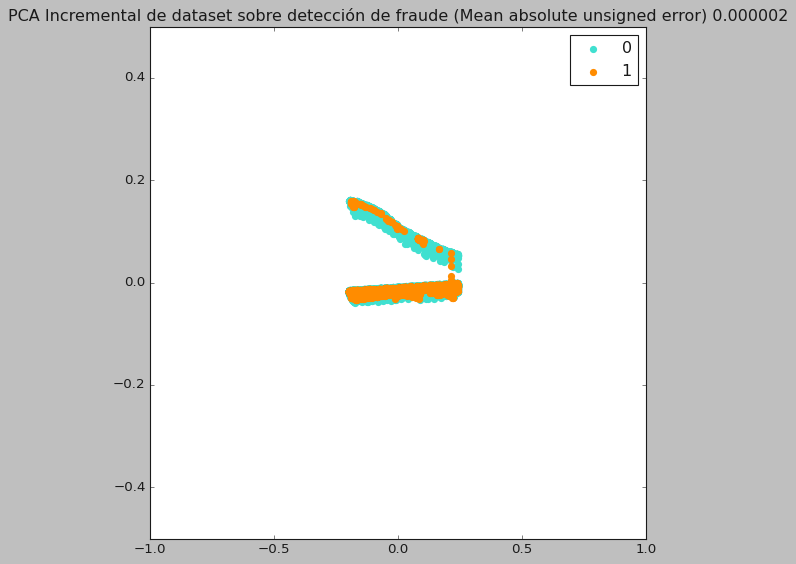

In [ ]:
n_components = 60
fpca = FastICA(n_components=n_components, max_iter=200)
Xfica = fpca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['turquoise', 'darkorange']


plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], target_n):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1],
                color=color, lw=2, label=target_name)
    err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
    plt.title("PCA Incremental de dataset sobre detección de fraude (Mean absolute unsigned error) "
              "%.6f" % err)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis([-1, 1, -0.5, 0.5])

plt.show()

In [ ]:
Xica = pd.DataFrame(Xfica)

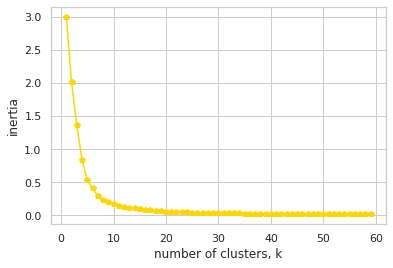

In [ ]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,60):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Xica.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,60), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.ticklabel_format(useOffset=False, style='plain')

#plt.xticks(ks)
plt.show()

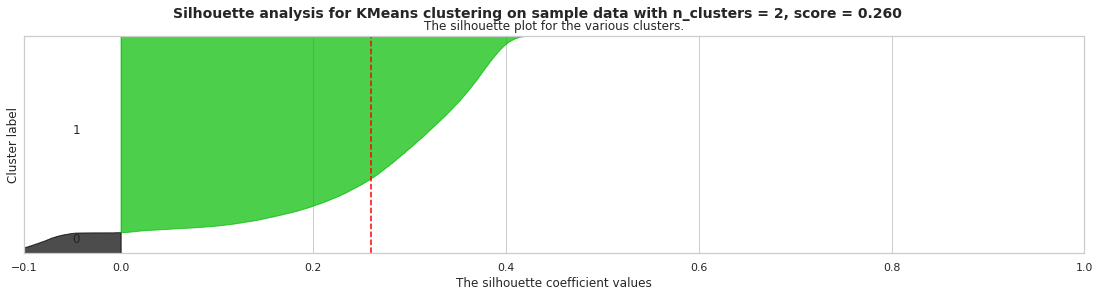

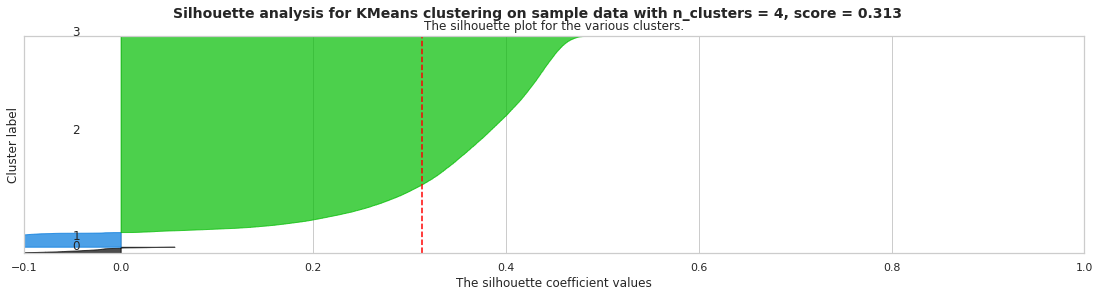

In [ ]:
range_n_clusters = [2, 4]
silhouette_analysis(Xica, range_n_clusters)

In [ ]:
nclusters=2
model = KMeans(n_clusters=nclusters)
model.fit(Xica.iloc[:,:2])
labels = model.predict(Xica.iloc[:,:2])

In [ ]:
impresión_reporte(nclusters,Y,labels)

Reporte de métricas para KMeans con clusters = 2
--------------------------------------------------------------------------------
Log_loss = 3.1641987124926327
Puntuación de exactitud = 0.9083870802620803
Puntuación de sensibilidad = 0.0
Puntuación de precisión = 0.0
Puntuación de Rand ajustado = -0.0012577808606801177
Puntuación de Jaccard = 0.0
Matriz de confusión = 
            Fraude:1  NoFraude:0
Fraude:1           0        7104
NoFraude:0        55       70985


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xica, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train, X_test, y_train, y_test, "PCA", "ICA con 60 componentes")

---Método de trabajo: PCA---
---Observando comportamiendo de métricas para ICA con 60 componentes---
The accuracy score of Random Forest: 0.9617117117117117
The ROC_AUC score of Random Forest: 0.7957488738738737
The F1 score of Random Forest: 0.8586294943765548
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9679054054054054
The ROC_AUC score of Gradient Boosting: 0.8295608108108108
The F1 score of Gradient Boosting: 0.9679054054054053
---------------------------------------------------
The accuracy score of XGBoost: 0.9333026208026208
The ROC_AUC score of XGBoost: 0.649634009009009
The F1 score of XGBoost: 0.9333026208026208
---------------------------------------------------
The accuracy score of Regresión logística: 0.9090909090909091
The ROC_AUC score of Regresión logística: 0.5
The F1 score of Regresión logística: 0.9090909090909091
---------------------------------------------------
The accuracy score of Naive Bayes: 0.41717854217854

In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

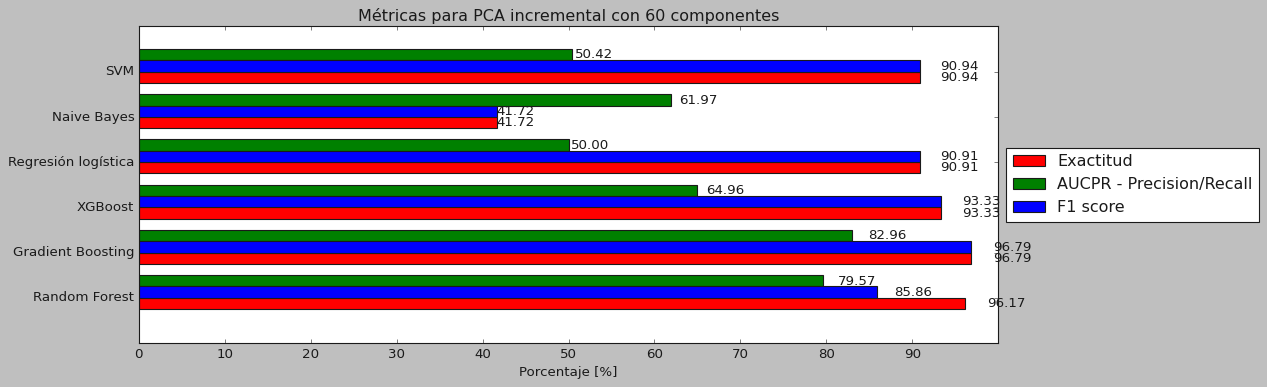

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para PCA incremental con 60 componentes')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,100, 10))
ax.set_xticklabels(range(0,100, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# **5. Model selection**

## **A. SelectFromModel**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42, stratify=Y)

### **A.1. GradientBoosting**

In [ ]:
sel_rf=SelectFromModel(GradientBoostingClassifier(learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2))

sel_rf.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                     criterion='friedman_mse',
                                                     init=None,
                                                     learning_rate=0.1,
                                                     loss='deviance',
                                                     max_depth=20,
                                                     max_features=15,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                

In [ ]:
sel_rf.get_support()

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
print("Total number of features in the database: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", sel_rf.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-sel_rf.get_support().sum()))

Total number of features in the database:  430
Total number of features after removing according to RF feature importances:  94
Total features removed:  336


In [ ]:
X_train_rfc=sel_rf.transform(X_train)
X_test_rfc=sel_rf.transform(X_test)

In [ ]:
X_train_rfc.shape, X_test_rfc.shape

((58608, 94), (19536, 94))

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "SelectFromModel", "Reducción de características")

---Método de trabajo: SelectFromModel---
---Observando comportamiendo de métricas para Reducción de características---
The accuracy score of Random Forest: 0.9773751023751024
The ROC_AUC score of Random Forest: 0.8803772522522523
The F1 score of Random Forest: 0.9236448201320676
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9818284193284194
The ROC_AUC score of Gradient Boosting: 0.9038569819819819
The F1 score of Gradient Boosting: 0.9818284193284194
---------------------------------------------------
The accuracy score of XGBoost: 0.9659602784602784
The ROC_AUC score of XGBoost: 0.8213963963963964
The F1 score of XGBoost: 0.9659602784602783
---------------------------------------------------
The accuracy score of Regresión logística: 0.9090909090909091
The ROC_AUC score of Regresión logística: 0.5
The F1 score of Regresión logística: 0.9090909090909091
---------------------------------------------------
The accuracy score of Naive Baye

In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

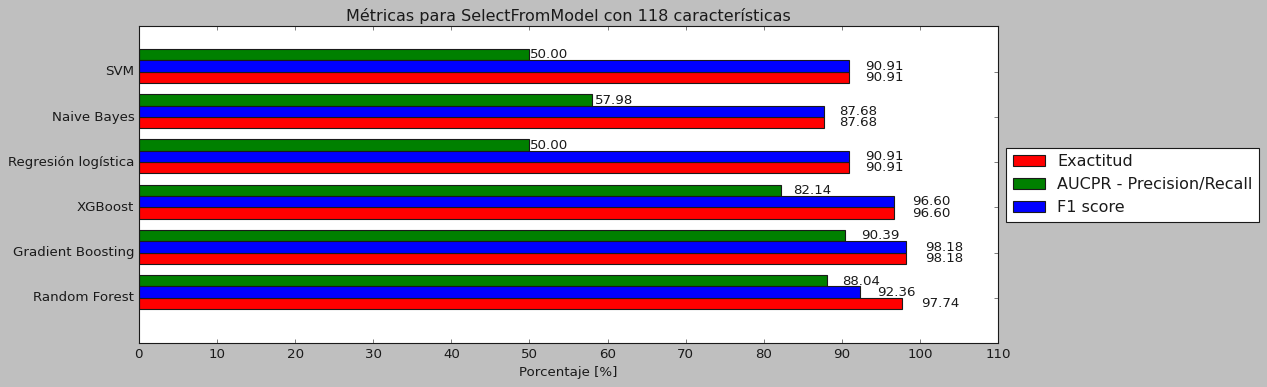

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para SelectFromModel con 118 características')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
model1 = GradientBoostingClassifier(random_state=40, learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
model1.fit(X_train_rfc,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=20,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

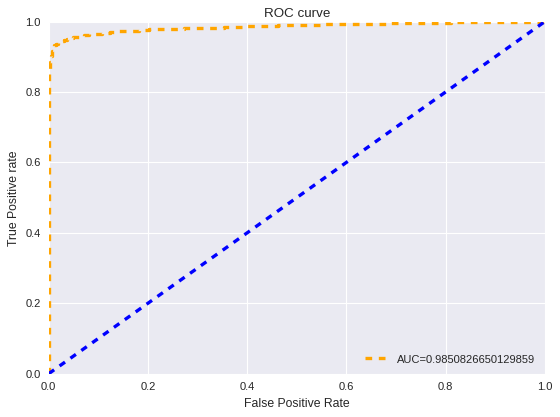

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
roc_curve_plot(model=model1,model_name='Gradient Boosting Classifier', ytest=y_test, xtest=X_test_rfc)

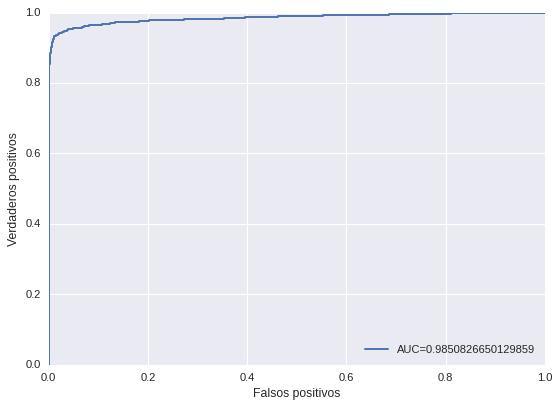

In [ ]:
y_pred_proba = model1.predict_proba(X_test_rfc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.legend(loc=4)
plt.show()

In [ ]:
predic=model1.predict(X_test_rfc)
cm = confusion_matrix(y_test, predic)

In [ ]:
suma=[]
for i in cm: 
  suma.append(sum(i))
matrix=[]
matrix.append((cm[0]/suma[0])*100)
matrix.append((cm[1]/suma[1])*100)   

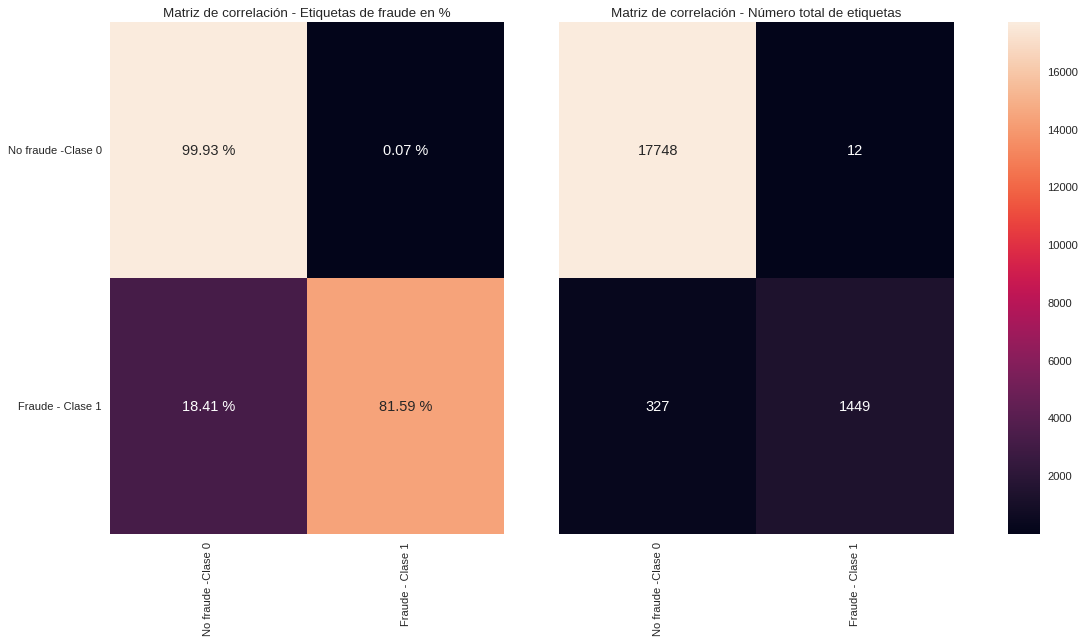

In [ ]:
x_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for x-axis
y_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for y-axis
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]},figsize=(15,8))
ax1.get_shared_y_axes().join(ax1,ax2)
map1=sns.heatmap(matrix, annot=True, fmt='.2f', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False,ax=ax1, annot_kws={"fontsize":13})
for t in map1.texts: t.set_text(t.get_text() + " %")
map1.set_ylabel('')
map1.set_xlabel('')
map1.title.set_text('Matriz de correlación - Etiquetas de fraude en %')
map2=sns.heatmap(cm, annot=True, fmt='d', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, annot_kws={"fontsize":13}, cbar_ax=axcb )
map2.set_ylabel('')
map2.set_xlabel('')
map2.set_yticks([])
map2.title.set_text('Matriz de correlación - Número total de etiquetas')

for ax in [map1,map2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

### **A.2. XGBoost**

In [ ]:
sel_rf=SelectFromModel(XGBClassifier(eta=0.1, stopping_metric='log_loss',keep_cross_validation_predictions=True,reg_alpha= 0, objective='binary:logistic',subsample=0.6,nfolds=3, max_depth=35,colsample_bytree= 0.8))

sel_rf.fit(X_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        colsample_bylevel=1, colsample_bynode=1,
                                        colsample_bytree=0.8, eta=0.1, gamma=0,
                                        keep_cross_validation_predictions=True,
                                        learning_rate=0.1, max_delta_step=0,
                                        max_depth=35, min_child_weight=1,
                                        missing=None, n_estimators=100,
                                        n_jobs=1, nfolds=3, nthread=None,
                                        objective='binary:logistic',
                                        random_state=0, reg_alpha=0,
                                        reg_lambda=1, scale_pos_weight=1,
                                        seed=None, silent=None,
                                        stopping_metric='log_loss',
                                        subs

In [ ]:
sel_rf.get_support()

array([ True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,

In [ ]:
print("Total number of features in the database: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", sel_rf.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-sel_rf.get_support().sum()))

Total number of features in the database:  430
Total number of features after removing according to RF feature importances:  73
Total features removed:  357


In [ ]:
X_train_rfc=sel_rf.transform(X_train)
X_test_rfc=sel_rf.transform(X_test)

In [ ]:
X_train_rfc.shape, X_test_rfc.shape

((58608, 73), (19536, 73))

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "SelectFromModel", "Reducción de características")

---Método de trabajo: SelectFromModel---
---Observando comportamiendo de métricas para Reducción de características---
The accuracy score of Random Forest: 0.9657043407043407
The ROC_AUC score of Random Forest: 0.8253096846846847
The F1 score of Random Forest: 0.8787498369636103
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9657555282555282
The ROC_AUC score of Gradient Boosting: 0.8347128378378378
The F1 score of Gradient Boosting: 0.9657555282555282
---------------------------------------------------
The accuracy score of XGBoost: 0.9676494676494677
The ROC_AUC score of XGBoost: 0.8294200450450451
The F1 score of XGBoost: 0.9676494676494677
---------------------------------------------------
The accuracy score of Regresión logística: 0.9090909090909091
The ROC_AUC score of Regresión logística: 0.5
The F1 score of Regresión logística: 0.9090909090909091
---------------------------------------------------
The accuracy score of Naive Baye

In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

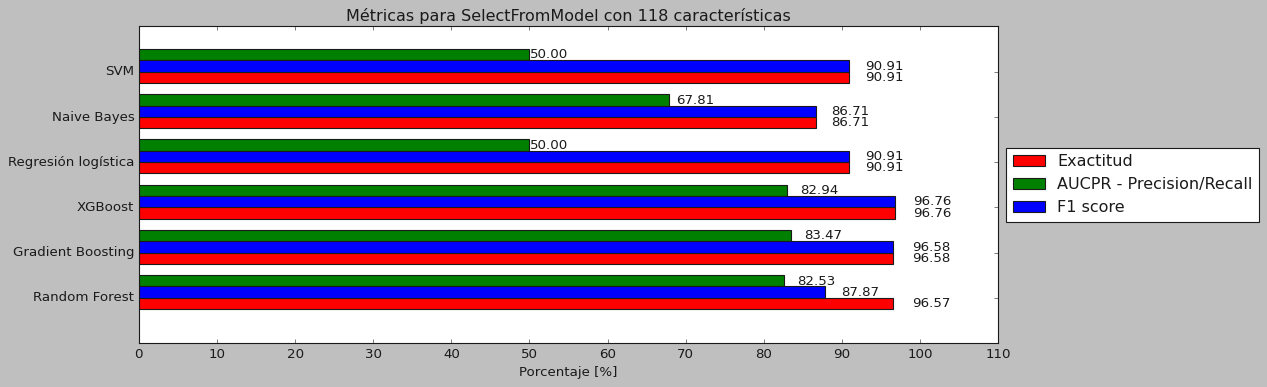

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para SelectFromModel con 118 características')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
classifier_model(X_train, X_test, y_train, y_test, "Random Forest Feature importance", "All Features")

---Feature Selection method: Random Forest Feature importance---
---Checking Accuracy with All Features---
The accuracy score of Random Forest: 0.9795447554598585
The accuracy score of Gradient Boosting: 0.9795447554598585


In [ ]:
model1 = GradientBoostingClassifier(random_state=40, learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
model1.fit(X_train_rfc,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=20,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

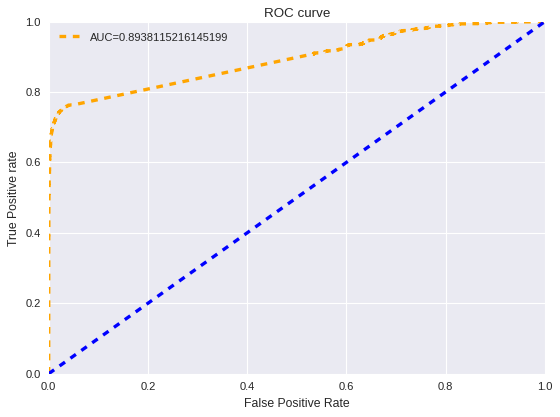

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
roc_curve_plot(model=model1,model_name='Gradient Boosting Classifier', ytest=y_test, xtest=X_test_rfc)

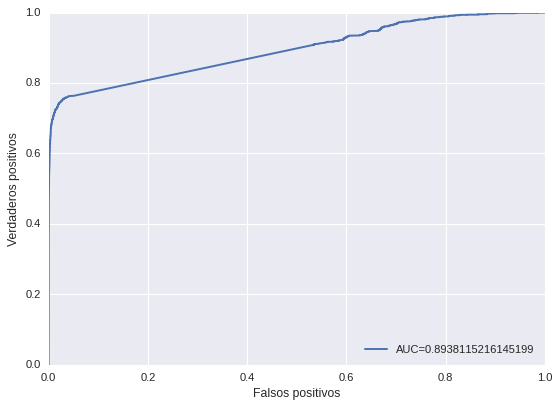

In [ ]:
y_pred_proba = model1.predict_proba(X_test_rfc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.legend(loc=4)
plt.show()

In [ ]:
predic=model1.predict(X_test_rfc)
cm = confusion_matrix(y_test, predic)

In [ ]:
suma=[]
for i in cm: 
  suma.append(sum(i))
matrix=[]
matrix.append((cm[0]/suma[0])*100)
matrix.append((cm[1]/suma[1])*100)   

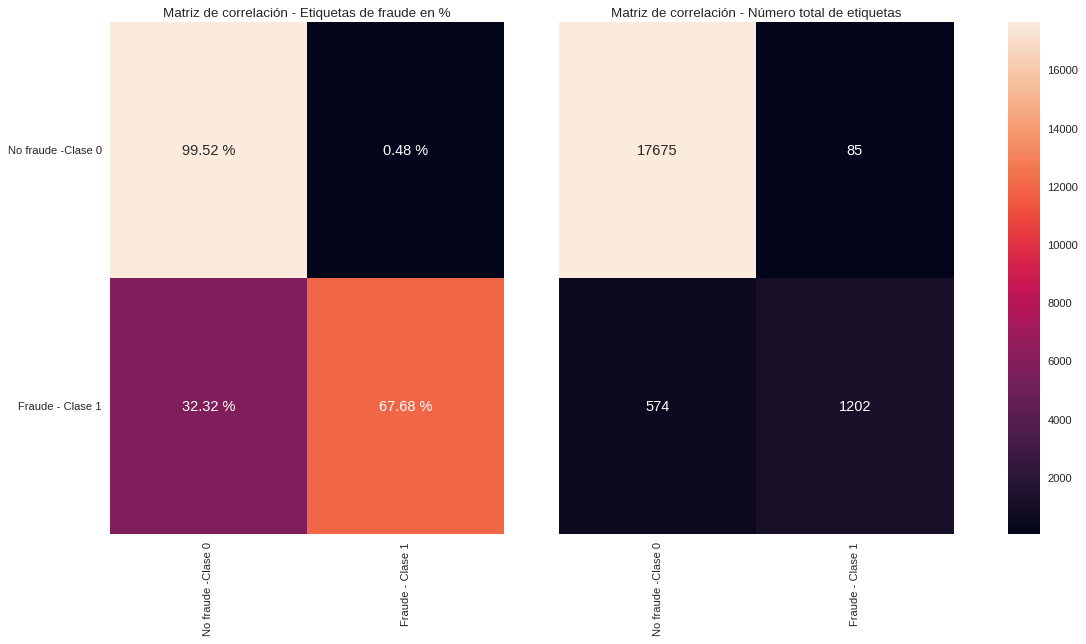

In [ ]:
x_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for x-axis
y_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for y-axis
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]},figsize=(15,8))
ax1.get_shared_y_axes().join(ax1,ax2)
map1=sns.heatmap(matrix, annot=True, fmt='.2f', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False,ax=ax1, annot_kws={"fontsize":13})
for t in map1.texts: t.set_text(t.get_text() + " %")
map1.set_ylabel('')
map1.set_xlabel('')
map1.title.set_text('Matriz de correlación - Etiquetas de fraude en %')
map2=sns.heatmap(cm, annot=True, fmt='d', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, annot_kws={"fontsize":13}, cbar_ax=axcb )
map2.set_ylabel('')
map2.set_xlabel('')
map2.set_yticks([])
map2.title.set_text('Matriz de correlación - Número total de etiquetas')

for ax in [map1,map2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

## **B. RFE**

### **B.1. GradientBoosting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
selector = RFE(estimator, n_features_to_select=118, step=5, verbose=3)
selector = selector.fit(X_train, y_train)

Fitting estimator with 430 features.
Fitting estimator with 425 features.
Fitting estimator with 420 features.
Fitting estimator with 415 features.
Fitting estimator with 410 features.
Fitting estimator with 405 features.
Fitting estimator with 400 features.
Fitting estimator with 395 features.
Fitting estimator with 390 features.
Fitting estimator with 385 features.
Fitting estimator with 380 features.
Fitting estimator with 375 features.
Fitting estimator with 370 features.
Fitting estimator with 365 features.
Fitting estimator with 360 features.
Fitting estimator with 355 features.
Fitting estimator with 350 features.
Fitting estimator with 345 features.
Fitting estimator with 340 features.
Fitting estimator with 335 features.
Fitting estimator with 330 features.
Fitting estimator with 325 features.
Fitting estimator with 320 features.
Fitting estimator with 315 features.
Fitting estimator with 310 features.
Fitting estimator with 305 features.
Fitting estimator with 300 features.
F

In [ ]:
print("Total number of features in the database: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", selector.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-selector.get_support().sum()))

Total number of features in the database:  430
Total number of features after removing according to RF feature importances:  118
Total features removed:  312


In [ ]:
print(selector.ranking_)

[ 1  1  1  1  1 64 28 29  1  1 10 53 40 46 34 12 30 59 64 39 21 49 58 36
 44  1  1  1  1  1  1  1  1  1  1 59  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 18  1 55  1  1  1 16  6  1 63 59 24 33 28 58 14 60 43 26
 36  3  4 61 32 41 35 32  6  1 37 33 30 10 22 26 62 61 20 20 49 32 34 37
 10  9 17  1 22 40 64 36 21 17  1 44 13 29 33 37 35 25  3  1 38  6 39 44
 39 21  7  8 24 23 62 15  2 62 17 13 23 18 25  7 11  1 16  1 43 30 22  9
  1 43 37 16  1 63 63 13 33 41 19 54 10  1  1 40  1 15 27  1 22 46 21 35
 64 56 41 52 59 44 53 57 42 56 60 62 61 60 60 61 39 26 41  1  1  1  1  1
  1  1  1  1 16  6  8 58 14  9 53 57 23 28 19 34 24  4  1 12 11 15 18 38
  1  1 42 25 25 20 45 42 33 19  1  1 27 27 52 29 19 52 41 50 38 55 54 29
 50 45 55 49 56 60 47 55 10 23 12 48 59 28 51 42 49 50 43 20 55 31 12  3
  1  5 23 27  1 15 15 50 16  1  1 29  8 17 34  8 22 47  8 26 45 26 46 45
 47 46 24 48 47 21 48 35 51 51 57 51 45 63 63 49 44 51  5 48 52 56 53 36
 31 53 40 46 20  1 37 43 14 38 34 27  1  1  1 12  3

In [ ]:
X_train_rfc=selector.transform(X_train)
X_test_rfc=selector.transform(X_test)

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "RFE", "Reducción de características con 118 features")

---Método de trabajo: RFE---
---Observando comportamiendo de métricas para Reducción de características con 118 features---
The accuracy score of Random Forest: 0.9786036036036037
The ROC_AUC score of Random Forest: 0.8878941441441441
The F1 score of Random Forest: 0.9284126679833422
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.982545045045045
The ROC_AUC score of Gradient Boosting: 0.9080518018018018
The F1 score of Gradient Boosting: 0.982545045045045
---------------------------------------------------
The accuracy score of XGBoost: 0.9708742833742834
The ROC_AUC score of XGBoost: 0.8451295045045044
The F1 score of XGBoost: 0.9708742833742834
---------------------------------------------------
The accuracy score of Regresión logística: 0.9090909090909091
The ROC_AUC score of Regresión logística: 0.5
The F1 score of Regresión logística: 0.9090909090909091
---------------------------------------------------
The accuracy score of Naive B

In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

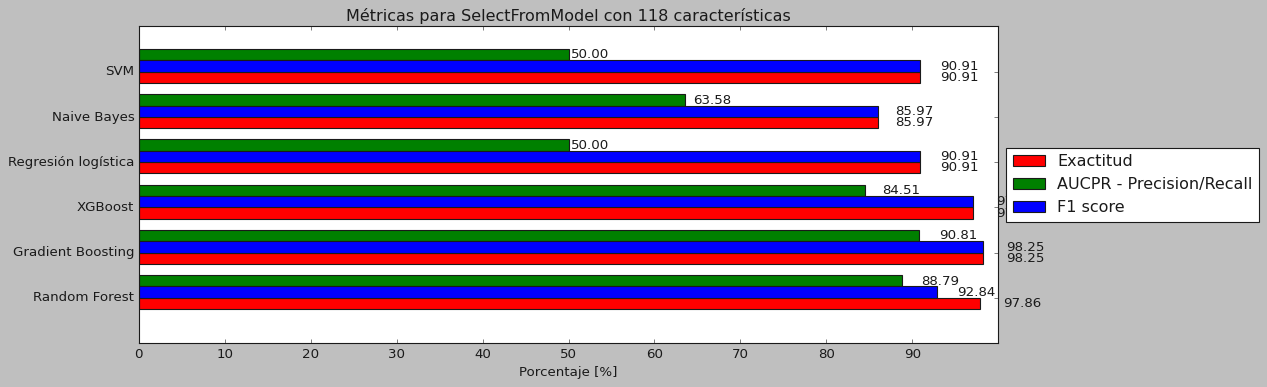

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para SelectFromModel con 118 características')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,100, 10))
ax.set_xticklabels(range(0,100, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
model1 = GradientBoostingClassifier(random_state=40, learning_rate=0.1, n_estimators=700,  max_depth=20, max_features=15, subsample=0.7, min_samples_leaf= 3, min_samples_split= 2)
model1.fit(X_train_rfc,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=20,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=700,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

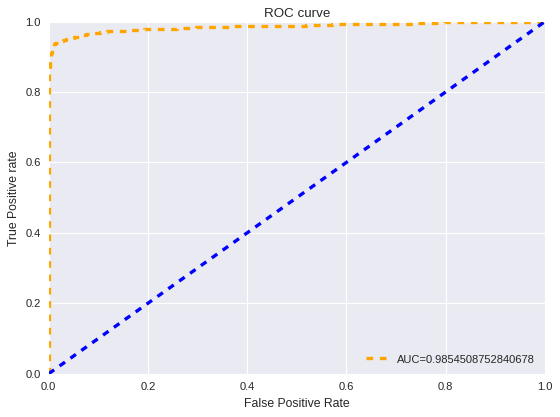

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
roc_curve_plot(model=model1,model_name='Gradient Boosting Classifier', ytest=y_test, xtest=X_test_rfc)

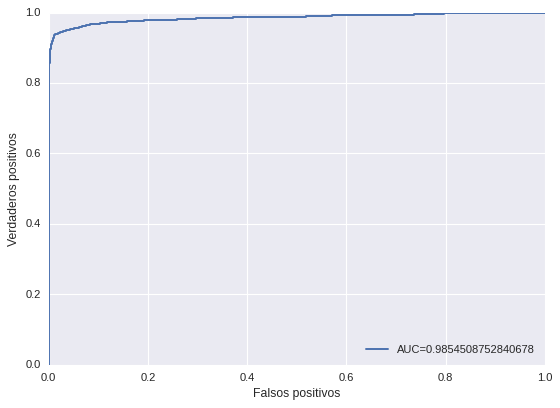

In [ ]:
y_pred_proba = model1.predict_proba(X_test_rfc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.legend(loc=4)
plt.show()

In [ ]:
predic=model1.predict(X_test_rfc)
cm = confusion_matrix(y_test, predic)

In [ ]:
y_test.value_counts()

0    17760
1     1776
Name: isFraud, dtype: int64

In [ ]:
suma=[]
for i in cm: 
  suma.append(sum(i))
matrix=[]
matrix.append((cm[0]/suma[0])*100)
matrix.append((cm[1]/suma[1])*100)  

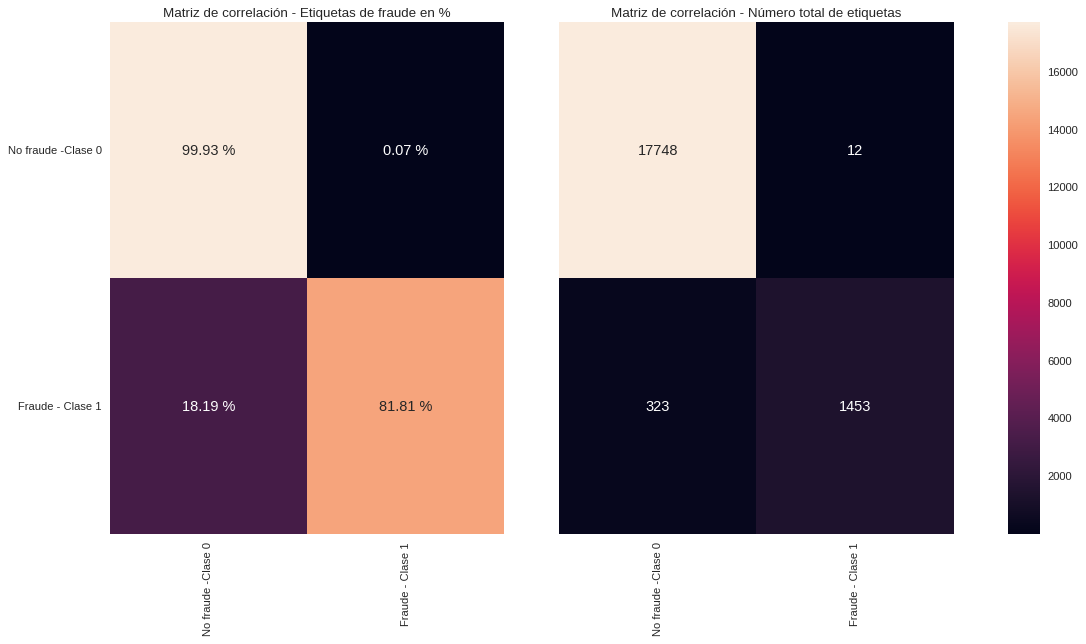

In [ ]:
x_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for x-axis
y_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for y-axis
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]},figsize=(15,8))
ax1.get_shared_y_axes().join(ax1,ax2)
map1=sns.heatmap(matrix, annot=True, fmt='.2f', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False,ax=ax1, annot_kws={"fontsize":13})
for t in map1.texts: t.set_text(t.get_text() + " %")
map1.set_ylabel('')
map1.set_xlabel('')
map1.title.set_text('Matriz de correlación - Etiquetas de fraude en %')
map2=sns.heatmap(cm, annot=True, fmt='d', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, annot_kws={"fontsize":13}, cbar_ax=axcb )
map2.set_ylabel('')
map2.set_xlabel('')
map2.set_yticks([])
map2.title.set_text('Matriz de correlación - Número total de etiquetas')

for ax in [map1,map2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42, stratify=Y)

In [ ]:
estimator = XGBClassifier(eta=0.1, stopping_metric='log_loss',keep_cross_validation_predictions=True,reg_alpha= 0, objective='binary:logistic',subsample=0.6,nfolds=3, max_depth=35,colsample_bytree= 0.8)
selector = RFE(estimator, n_features_to_select=120, step=6)
selector = selector.fit(X_train, y_train)

In [ ]:
print("Total number of features in the database: ", len(X_train.columns))
print("Total number of features after removing according to RF feature importances: ", selector.get_support().sum())
print("Total features removed: ", int(len(X_train.columns)-selector.get_support().sum()))

Total number of features in the database:  430
Total number of features after removing according to RF feature importances:  120
Total features removed:  310


In [ ]:
print(selector.ranking_)

[ 1  7  1  1  1 49 18  1  1  1  1 30 21 11 15  4 12 27 52  1 26 13  1 13
 15  4  1  1  3  5  7 18 13  1  1 41  1  1  1  1  1  3  2  1  1  1  1  1
  1  1  3 23 26 37 10 15  1 10 11 29 24  1 45  1  1  6  8 14 15 26 31 14
 21  1  1 31  1 31  2 36  6  8 36 29  5 18  5  1 53 52  1  1 46 41 35 45
  3  9 11 10  4 13 48  6 37  1  1 20 17  9  1 11 13  1  1  1 17  1  1  1
 26 30  1  4  1  9 53  1  1 53  1  1 28 40 43 30  1  1 12  1 12 18 34  6
  1 23 28  1  1 53 53  1  1 32 44 21 23 27 25 40 29 16  1  1 28  1  1  1
 53 21 23 39 48 24 50 37 34 39 48 50 49 50 31 51 15 19 22 24 33 36 19 17
 17 28 19 31 45 37 48 51  2  1  1  5 20  1  1 31 21  1  1  1  1  1  1  1
  1  1 44 27 19  7 24 37 42 20  1  1 33 38 50  8 33 16  7  1 29 34 20 42
 45 12 34 47 49 46 51 28  3 17  1 42 38 30 43 36 39 36  1 16 32 10 27 33
 27 43 32 20 38 44 41 52 44  1 44 45 30 47 35 25 38 40  9 29  1  4  1 46
 23 22 19 25  1  1 23 35  8  1 50 32 37 51 49 28  1 33  1 32 36  8 40  9
 17 19 14 25 38 14  1  1 14 16 21  7 35 35 41 47 51

In [ ]:
X_train_rfc=selector.transform(X_train)
X_test_rfc=selector.transform(X_test)

In [ ]:
accurac, roc_auc_s,f1_sco, models=classifier_model(X_train_rfc, X_test_rfc, y_train, y_test, "RFE", "Reducción de características con 118 features")

---Método de trabajo: RFE---
---Observando comportamiendo de métricas para Reducción de características con 118 features---
The accuracy score of Random Forest: 0.9805487305487306
The ROC_AUC score of Random Forest: 0.8996058558558558
The F1 score of Random Forest: 0.9357668413034799
---------------------------------------------------
The accuracy score of Gradient Boosting: 0.9833640458640459
The ROC_AUC score of Gradient Boosting: 0.9138231981981982
The F1 score of Gradient Boosting: 0.9833640458640459
---------------------------------------------------
The accuracy score of XGBoost: 0.9707719082719083
The ROC_AUC score of XGBoost: 0.8458333333333333
The F1 score of XGBoost: 0.9707719082719082
---------------------------------------------------
The accuracy score of Regresión logística: 0.9090909090909091
The ROC_AUC score of Regresión logística: 0.5
The F1 score of Regresión logística: 0.9090909090909091
---------------------------------------------------
The accuracy score of Naive

In [ ]:
accurac=[np.round(k*100,2) for k in accurac] 
roc_auc_s=[np.round(k*100,2) for k in roc_auc_s] 
f1_sco=[np.round(k*100,2) for k in f1_sco] 

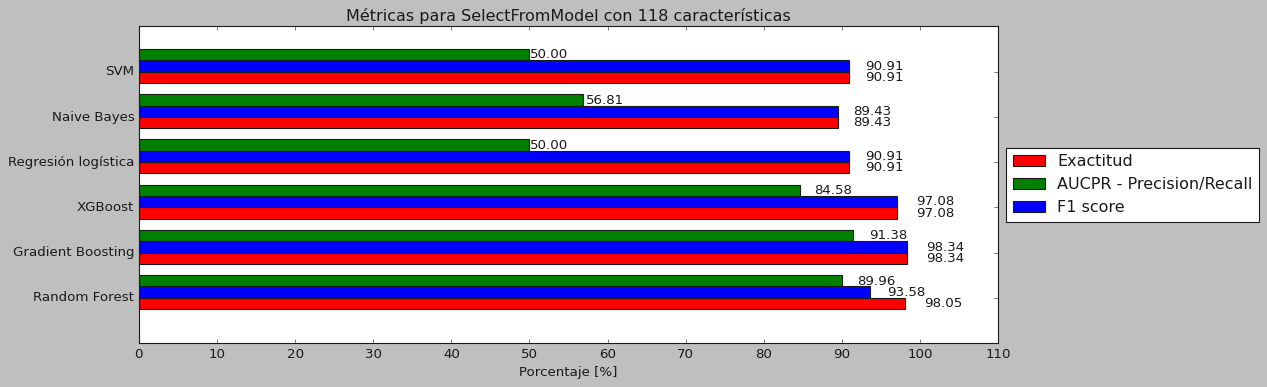

In [ ]:
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
plt.style.use('classic')
fig, ax = plt.subplots(1, 1, figsize=(16, 5))


rects1 = ax.barh(x - width/2, accurac, width, color= 'red', label='Exactitud')
rects2 = ax.barh(x + 1.5*width, roc_auc_s, width, color= 'green', label='AUCPR - Precision/Recall')
rects3 = ax.barh(x + width/2, f1_sco, width, color= 'blue', label='F1 score')
# Add some text for labels, title and custom x-axis tick labels, etc.
#axs[1].set_ylabel('Modelos')
ax.set_title('Métricas para SelectFromModel con 118 características')
ax.set_xlabel('Porcentaje [%]')
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xticks(range(0,120, 10))
ax.set_xticklabels(range(0,120, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax.bar_label(rects1, padding=3)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### **B.2. XGBoost**

In [ ]:
model1 = XGBClassifier(eta=0.01,scale_pos_weight = 1,reg_alpha= 0.05, stopping_metric='log_loss',keep_cross_validation_predictions=True, objective='binary:logistic', nfolds=3, seed= -1,max_depth= 15,gamma=0.0,colsample_bytree =0.6,subsample=0.6)
model1.fit(X_train_rfc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.01, gamma=0.0,
              keep_cross_validation_predictions=True, learning_rate=0.1,
              max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nfolds=3, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0.05,
              reg_lambda=1, scale_pos_weight=1, seed=-1, silent=None,
              stopping_metric='log_loss', subsample=0.6, verbosity=1)

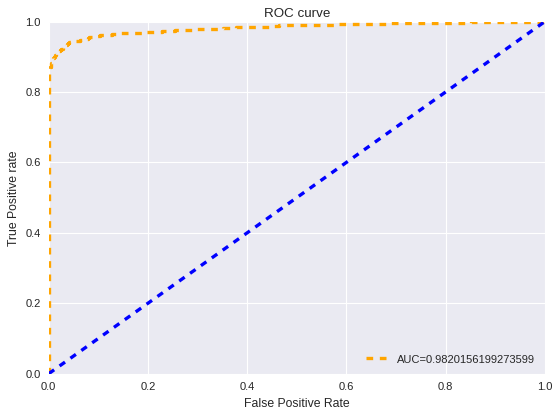

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
roc_curve_plot(model=model1,model_name='Gradient Boosting Classifier', ytest=y_test, xtest=X_test_rfc)

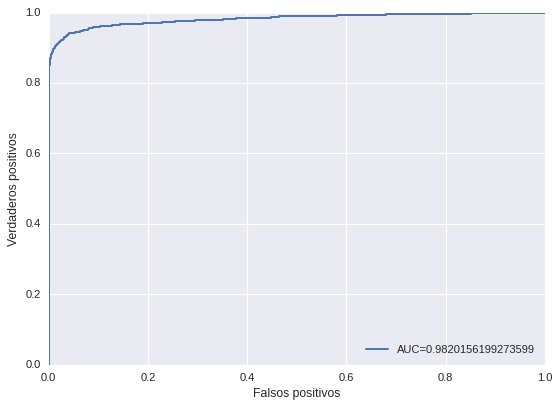

In [ ]:
y_pred_proba = model1.predict_proba(X_test_rfc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('Verdaderos positivos')
plt.xlabel('Falsos positivos')
plt.legend(loc=4)
plt.show()

In [ ]:
predic=model1.predict(X_test_rfc)
cm = confusion_matrix(y_test, predic)

In [ ]:
y_test.value_counts()

0    17760
1     1776
Name: isFraud, dtype: int64

In [ ]:
cm

array([[17742,    18],
       [  282,  1494]])

In [ ]:
suma=[]
for i in cm: 
  suma.append(sum(i))
matrix=[]
matrix.append((cm[0]/suma[0])*100)
matrix.append((cm[1]/suma[1])*100) 

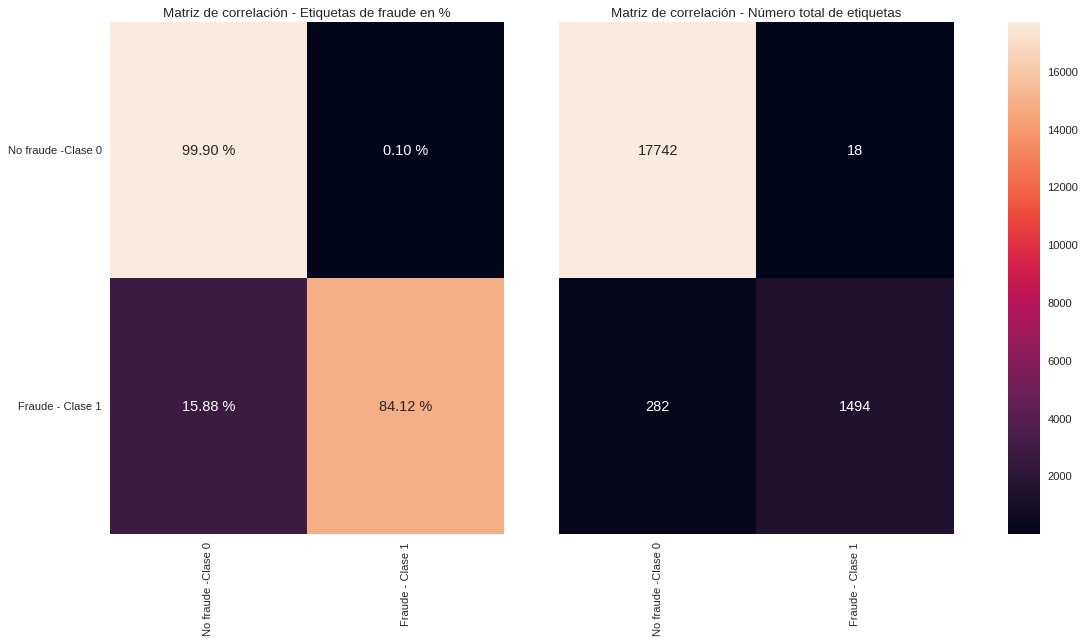

In [ ]:
x_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for x-axis
y_axis_labels = ['No fraude -Clase 0', 'Fraude - Clase 1'] # labels for y-axis
f,(ax1,ax2, axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]},figsize=(15,8))
ax1.get_shared_y_axes().join(ax1,ax2)
map1=sns.heatmap(matrix, annot=True, fmt='.2f', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=False,ax=ax1, annot_kws={"fontsize":13})
for t in map1.texts: t.set_text(t.get_text() + " %")
map1.set_ylabel('')
map1.set_xlabel('')
map1.title.set_text('Matriz de correlación - Etiquetas de fraude en %')
map2=sns.heatmap(cm, annot=True, fmt='d', cmap="rocket", xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax2, annot_kws={"fontsize":13}, cbar_ax=axcb )
map2.set_ylabel('')
map2.set_xlabel('')
map2.set_yticks([])
map2.title.set_text('Matriz de correlación - Número total de etiquetas')

for ax in [map1,map2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

### **B.3. AutoML**

In [ ]:
xtr = pd.DataFrame(X_train_rfc)
# ytr= pd.DataFrame(y_train)
xte = pd.DataFrame(X_test_rfc)
# yte=pd.DataFrame(y_test)
xtr.index = y_train.index
train=pd.concat([xtr, y_train], axis=1)
xte.index = y_test.index
test= pd.concat([xte, y_test], axis=1)

In [ ]:
y_train.shape

(58608,)

In [ ]:
X_train_rfc.shape

(58608, 120)

In [ ]:
train

0             1  ...           119  isFraud
66180  5.887847e-07  5.887847e-07  ...  2.943923e-07        0
44289  1.245718e-06  6.228592e-07  ...  0.000000e+00        0
41415  3.130342e-07  6.260684e-07  ...  0.000000e+00        0
76335  0.000000e+00  3.187440e-07  ...  0.000000e+00        1
10677  1.325840e-06  6.629199e-07  ...  0.000000e+00        0
...             ...           ...  ...           ...      ...
54505  1.211944e-06  6.059721e-07  ...  0.000000e+00        1
72528  1.154833e-06  2.887083e-07  ...  0.000000e+00        0
64636  1.182114e-06  5.910568e-07  ...  0.000000e+00        0
70880  1.158311e-06  5.791553e-07  ...  0.000000e+00        0
37825  1.262639e-06  6.313197e-07  ...  0.000000e+00        0

[58608 rows x 121 columns]

In [ ]:
! pip install requests
! pip install tabulate
! pip install "colorama>=0.3.8"
! pip install future

In [ ]:
! pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 175.8 MB 29 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=40903802beeb459cd46697f7c2d9a1deb5f022c5f3a18fede5e6eb7c1708eed6
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt13j0qku
  JVM stdout: /tmp/tmpt13j0qku/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpt13j0qku/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.3
H2O_cluster_version_age:    17 days
H2O_cluster_name:           H2O_from_python_unknownUser_11eur2
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

In [ ]:
hftrainn_01 = h2o.H2OFrame(train)
#hftest =h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
trainn_01, testn_01 = hftrainn_01.split_frame(ratios=[.7]) #mirar en diferentes proporciones 70/30 ... 

In [ ]:
xn_01 = trainn_01.columns
yn_01 = "isFraud"
xn_01.remove(yn_01)

In [ ]:
trainn_01[yn_01] = trainn_01[yn_01].asfactor()


In [ ]:
aml = H2OAutoML(max_runtime_secs = 3600*3, max_models=15, seed=1) 
#
aml.train(x=xn_01, y=yn_01, training_frame=trainn_01)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20211024_221442 0.983282 0.0519957 0.954102 0.0608111 0.108942 0.0118683 
 StackedEnsemble_AllModels_6_AutoML_1_20211024_221442 0.983246 0.052009 0.954166 0.0607574 0.108915 0.0118626 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20211024_221442 0.983065 0.0541289 0.951928 0.0632707 0.111453 0.0124218 
 StackedEnsemble_BestOfFamily_7_AutoML_1_20211024_221442 0.983033 0.0541512 0.951956 0.0617806 0.111484 0.0124288 
 StackedEnsemble_AllModels_1_AutoML_1_20211024_221442 0.983016 0.052439 0.953776 0.0596101 0.109456 0.0119806 
 StackedEnsemble_AllModels_2_AutoML_1_20211024_221442 0.982978 0.0524647 0.953734 0.0593861 0.109528 0.0119963 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20211024_221442 0.982893 0.0544067 0.951486 0.0630982 0.111589 0.0124521 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20211024_221442 0.982748 0.0545044 0.951387 0.0662663 0.111801 0.0124995 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20211024_221442 0.982359 0.0550706 0.950999 0.065278 0.112375 0.012628 
 StackedEnsemble_AllModels_5_AutoML_1_20211024_221442 0.982329 0.0524541 0.95324 0.0611499 0.108256 0.0117193 
 GBM_1_AutoML_1_20211024_221442 0.982258 0.0576688 0.949887 0.0638168 0.115184 0.0132674 
 StackedEnsemble_BestOfFamily_6_AutoML_1_20211024_221442 0.982138 0.0549506 0.950619 0.0638107 0.111586 0.0124515 
 GBM_2_AutoML_1_20211024_221442 0.98117 0.0579741 0.948638 0.0625105 0.11573 0.0133934 
 GBM_4_AutoML_1_20211024_221442 0.981144 0.0576241 0.950792 0.0636423 0.115219 0.0132754 
 StackedEnsemble_AllModels_4_AutoML_1_20211024_221442 0.981039 0.0554562 0.949962 0.0636343 0.110117 0.0121258 
 GBM_3_AutoML_1_20211024_221442 0.98072 0.057694 0.949909 0.0649755 0.11512 0.0132527 
 StackedEnsemble_BestOfFamily_5_AutoML_1_20211024_221442 0.980717 0.0565088 0.948332 0.0636001 0.112259 0.0126021 
 XGBoost_grid_1_AutoML_1_20211024_221442_model_2 0.98018 0.0612088 0.944629 0.0680482 0.118297 0.0139943 
 GBM_grid_1_AutoML_1_20211024_221442_model_1 0.98011 0.0617467 0.947854 0.0634451 0.117931 0.0139078 
 XGBoost_3_AutoML_1_20211024_221442 0.978112 0.0633906 0.9401 0.073174 0.120333 0.01448 
 XGBoost_grid_1_AutoML_1_20211024_221442_model_1 0.977928 0.0644591 0.93922 0.0807245 0.12164 0.0147963 
 XGBoost_2_AutoML_1_20211024_221442 0.977777 0.0648663 0.939077 0.0746755 0.120725 0.0145746 
 XGBoost_1_AutoML_1_20211024_221442 0.976366 0.0661819 0.937278 0.0726266 0.122695 0.015054 
 GBM_5_AutoML_1_20211024_221442 0.97463 0.0732067 0.924298 0.0825105 0.130283 0.0169736 
 DRF_1_AutoML_1_20211024_221442 0.969244 0.092226 0.918682 0.0834344 0.145773 0.0212498 
 XRT_1_AutoML_1_20211024_221442 0.968596 0.0925017 0.917701 0.0820342 0.145802 0.0212583 
 DeepLearning_1_AutoML_1_20211024_221442 0.903792 0.175783 0.68912 0.200846 0.215654 0.0465066 
 GLM_1_AutoML_1_20211024_221442 0.870235 0.205531 0.573875 0.266939 0.237883 0.0565882

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id auc logloss aucpr mean_per_class_error rmse mse training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20211024_221442 0.983282 0.0519957 0.954102 0.0608111 0.108942 0.0118683 8474 0.289507 StackedEnsemble 
 StackedEnsemble_AllModels_6_AutoML_1_20211024_221442 0.983246 0.052009 0.954166 0.0607574 0.108915 0.0118626 80040 0.283465 StackedEnsemble 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20211024_221442 0.983065 0.0541289 0.951928 0.0632707 0.111453 0.0124218 5814 0.118357 StackedEnsemble 
 StackedEnsemble_BestOfFamily_7_AutoML_1_20211024_221442 0.983033 0.0541512 0.951956 0.0617806 0.111484 0.0124288 60841 0.121397 StackedEnsemble 
 StackedEnsemble_AllModels_1_AutoML_1_20211024_221442 0.983016 0.052439 0.953776 0.0596101 0.109456 0.0119806 7403 0.223848 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20211024_221442 0.982978 0.0524647 0.953734 0.0593861 0.109528 0.0119963 8046 0.232806 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20211024_221442 0.982893 0.0544067 0.951486 0.0630982 0.111589 0.0124521 5640 0.099996 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20211024_221442 0.982748 0.0545044 0.951387 0.0662663 0.111801 0.0124995 6340 0.12044 StackedEnsemble 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20211024_221442 0.982359 0.0550706 0.950999 0.065278 0.112375 0.012628 6050 0.077347 StackedEnsemble 
 StackedEnsemble_AllModels_5_AutoML_1_20211024_221442 0.982329 0.0524541 0.95324 0.0611499 0.108256 0.0117193 33369 0.36633 StackedEnsemble

By applying some AutoML it is possible to observe that the AUC-ROC metric decreased by a small amount with respect to the AutoML analysis performed on the original data. 

In general, it is possible to observe the following: on the one hand, the different PCA applications can be used to effectively reduce the dimensions of a dataset and take advantage of the remaining information to generate predictions. In this case, dimensionality reduction with the help of PCA or model selection techniques did not contribute much to increase the correct prediction of fraud labels. For this reason, despite the usefulness, we will continue to work on the total number of features of our fraud problem. 

